In [1]:
# import data science libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# import data
labels = pd.read_csv('../data/earthquake/train_labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
building_id     260601 non-null int64
damage_grade    260601 non-null int64
dtypes: int64(2)
memory usage: 4.0 MB


In [3]:
data = pd.read_csv('../data/earthquake/train_values.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [4]:
#here we combine the data and labels together to get 1 dataframe to work with

combined_data = pd.merge(data, labels, on='building_id')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [5]:
# The 40th column is the damage_grade
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
# Here we take out only the age from the combined datafram to see the distribution of the age across all the buildings affected

ageData=combined_data['age']

# <font color='mediumblue'>1st assumption: Maybe age of the building may have an impact on the damage grade?</font>

### Distibution of the age of the buildings

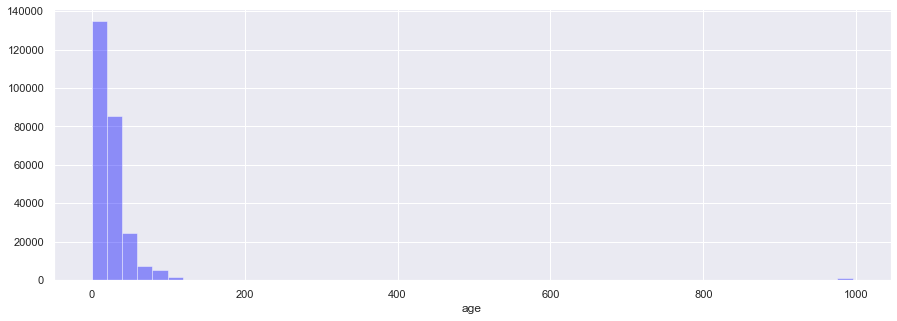

In [7]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))
sb.distplot(ageData, kde = False, color = "blue")

#### It can be seen that the most of the building's age is in range of 0 to 100

### Distribution of the damage levels

In [8]:
print("Number of Damage Levels :", len(combined_data["damage_grade"].unique()))
print(combined_data["damage_grade"].value_counts())

Number of Damage Levels : 3
2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


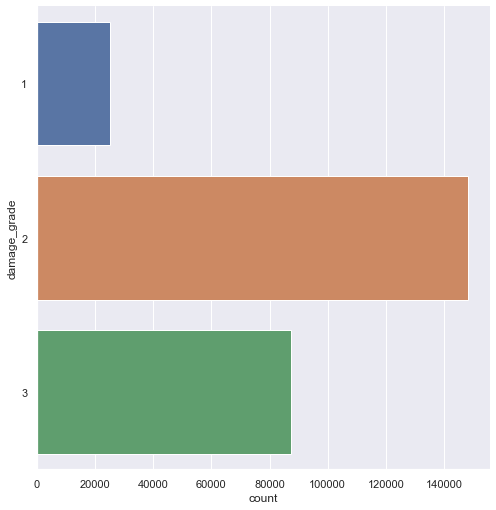

In [9]:
sb.catplot(y = "damage_grade", data = combined_data, kind = "count",height=7)

#### It can be seen most building has a damage level of 2

### Plotting damage vs age

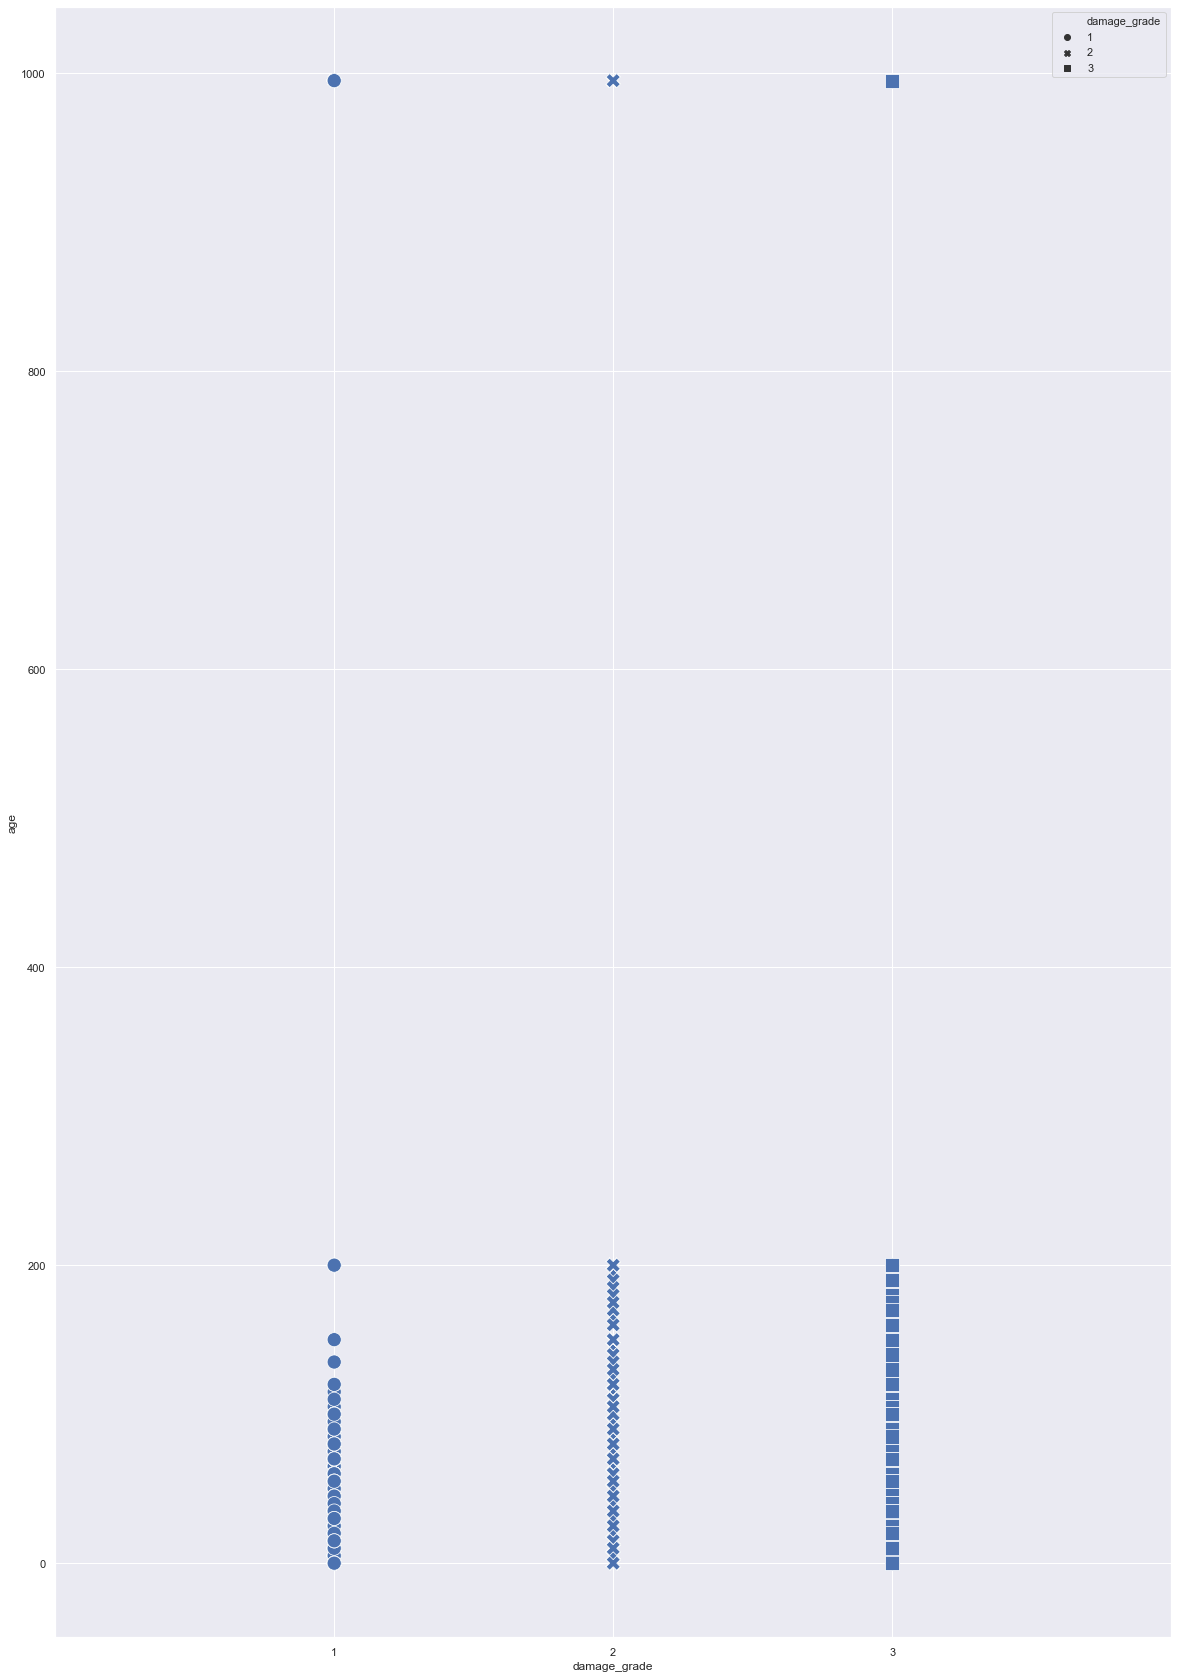

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
sb.scatterplot(x="damage_grade", y= "age",data =combined_data, style = "damage_grade", s=200)
ax.set_xlim(0,4)
ax.set_xticks(range(1,4))
plt.show()

#### Usually we will assume that the older the age, the higher the damage it will take. Here we can see that the damage grade is almost equally spread out over the age of the building.

## <font color='tomato'> Conclusion: Age of building does not have an effect on the damage grade </font>

# <div style = "margin: auto; width:80%;"> <font color='darkcyan'>Is  this part necessary? Till conclusion of 5th assumption.</font></div>

# <font color='mediumblue'>2nd assumption: Maybe legal ownership of the building may have an impact on the damage grade?</font>

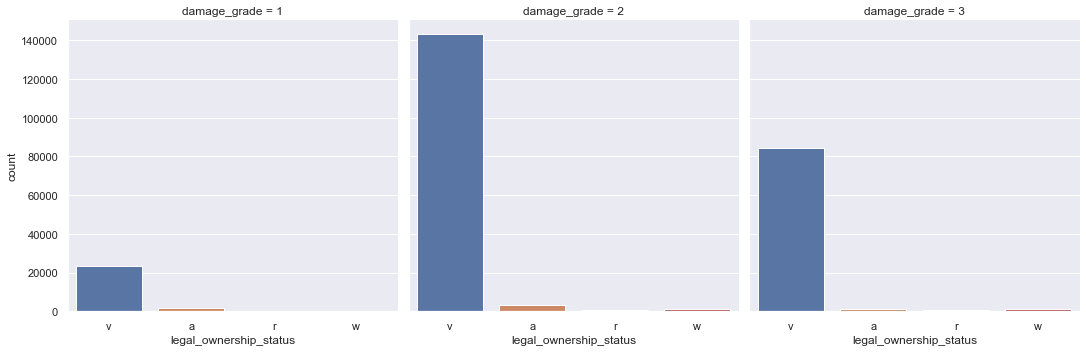

In [30]:
sb.catplot(x="legal_ownership_status",  data=combined_data,kind = 'count',col = "damage_grade")

## <font color='tomato'> Conclusion: legal ownership status v has the most damage</font>
### <b><font color="tomato">This could be disregareded as it could be possibly the status v is related to house hold type ownership</font></b> 

# <font color='mediumblue'>3rd assumption: Maybe position of the building may have an impact on the damage grade?</font>

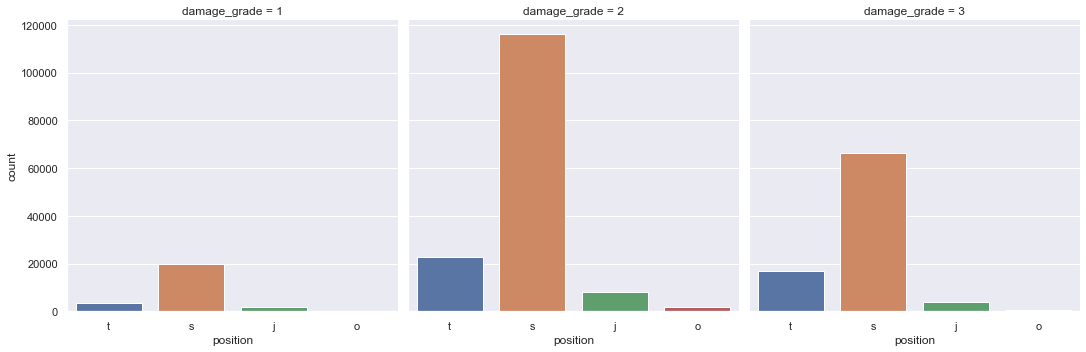

In [32]:
sb.catplot(x="position",  data=combined_data,kind = 'count',col = "damage_grade")

## <b><font color="tomato">Conclusion:</font></b> 
### <b><font color="tomato">Position S and T seems to take more damage compared to other positions</font></b> 

# <font color='mediumblue'>4th assumption: Maybe ground floor type of the building may have an impact on the damage grade?</font>

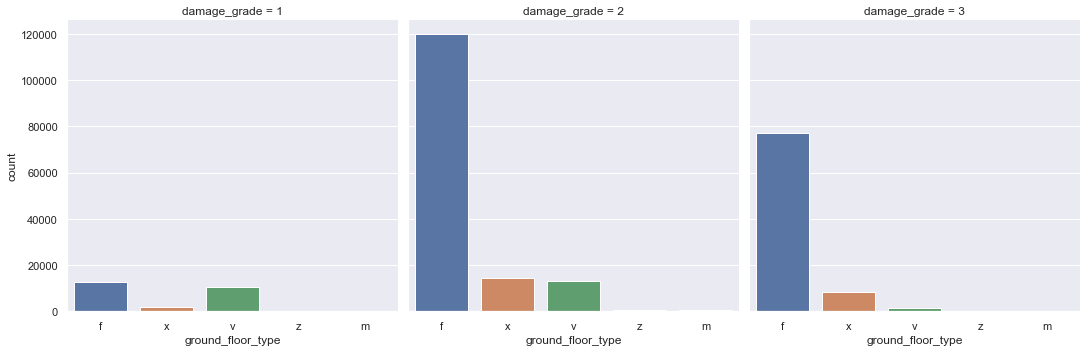

In [35]:
sb.catplot(x="ground_floor_type",  data=combined_data,kind = 'count',col = "damage_grade")

## <b><font color="tomato">Conclusion:</font></b> 
### <b><font color="tomato">Ground floor type f,x,v seems to take more damage compared to other positions</font></b> 

# <font color='mediumblue'>5th assumption: Maybe foundation type of the building may have an impact on the damage grade?</font>

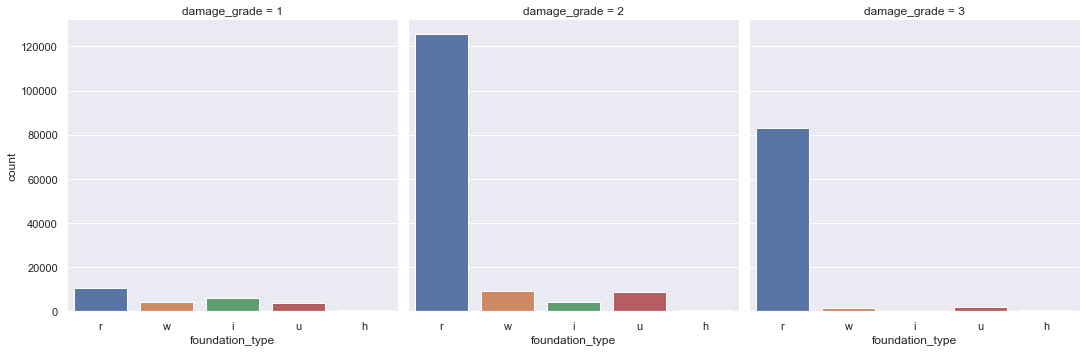

In [33]:
sb.catplot(x="foundation_type",  data=combined_data,kind = 'count',col = "damage_grade")

## <b><font color="tomato">Conclusion:</font></b> 
### <b><font color="tomato">Foundation type r seems to take more damage compared to other foundation types</font></b> 

# <div style = "margin: auto; width:40%;"> <font color='darkcyan'>-------------    Till here ----------------</font></div>

# <font color='mediumblue'>6th assumption: Maybe plan configuration of the building may have an impact on the damage grade?</font>

### Plotting the number of buildings damaged against different plan configuration

Text(0.5, 1.0, 'Which plan configuration contributed to most damage? \n\n')

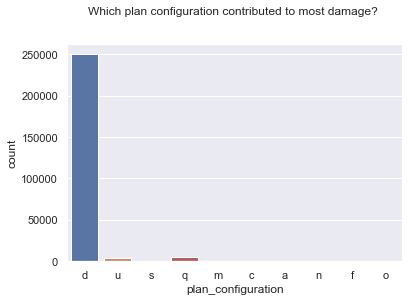

In [13]:
ax = sb.countplot(x="plan_configuration", data=combined_data)
ax.set_title("Which plan configuration contributed to most damage? \n\n")

### Plotting the number of buildings damaged against different plan configuration with damage grade

Text(0.5, 1.0, 'How many buildings are damaged with respect\n to the damage grade for each config plan? \n\n')

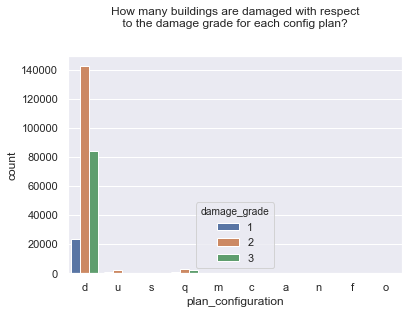

In [14]:
ax = sb.countplot(x="plan_configuration", hue= "damage_grade", data=combined_data)
ax.set_title("How many buildings are damaged with respect\n to the damage grade for each config plan? \n\n")

## <b><font color="tomato">Conclusion:</font></b> 
### <b><font color="tomato">Plan d contributed to most damage to builings</font></b> 
### <b><font color="tomato"> Plan q and Plan u was the next 2 highest contributer to damage compared to other plan configurations</font></b> 

# <font color='deeppink'>Plan configuration d seems to interesting</font>
## <font color='hotpink'>What causes plan configuration d to take more damage?</font>

### Sorting each config plan to 1 dataframe each

In [19]:
# We take out the plan config out from the combined data and make it into 1 df
# The above mentioned is used for looping only
planConfigDf = combined_data['plan_configuration']
planConfigDf.head()

0    d
1    d
2    d
3    d
4    d
Name: plan_configuration, dtype: object

In [20]:
# Empty lists for each plan configuration
aPlan= []
cPlan= []
dPlan= []
fPlan= []
mPlan= []
nPlan= []
oPlan= []
qPlan= []
sPlan= []
uPlan= []

# Here we add to the list accoridingly, with reference from the combined_data
for x in range(0,len(combined_data)):
    if(planConfigDf.iloc[x] == 'a'):
        aPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'c'):
        cPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'd'):
        dPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'f'):
        fPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'm'):
        mPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'n'):
        nPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'o'):
        oPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'q'):
        qPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 's'):
        sPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'u'):
        uPlan.append(combined_data.iloc[x])

In [21]:
# convert all the lists into dataframes
aPlanDf= pd.DataFrame(aPlan)
cPlanDf= pd.DataFrame(cPlan)
dPlanDf= pd.DataFrame(dPlan)
fPlanDf= pd.DataFrame(fPlan)
mPlanDf= pd.DataFrame(mPlan)
nPlanDf= pd.DataFrame(nPlan)
oPlanDf= pd.DataFrame(oPlan)
qPlanDf= pd.DataFrame(qPlan)
sPlanDf= pd.DataFrame(sPlan)
uPlanDf= pd.DataFrame(uPlan)

In [22]:
print("Number of buildings damaged in each plan configuration")
print("Plan Configuration A: ",len(aPlanDf))
print("Plan Configuration C: ",len(cPlanDf))
print("Plan Configuration D: ",len(dPlanDf))
print("Plan Configuration F: ",len(fPlanDf))
print("Plan Configuration M: ",len(mPlanDf))
print("Plan Configuration N: ",len(nPlanDf))
print("Plan Configuration O: ",len(oPlanDf))
print("Plan Configuration Q: ",len(qPlanDf))
print("Plan Configuration S: ",len(sPlanDf))
print("Plan Configuration U: ",len(uPlanDf))

print("\n\n Sum of all the plans: ",len(aPlanDf+cPlanDf+dPlanDf
                                        +fPlanDf+mPlanDf+nPlanDf
                                        +oPlanDf+qPlanDf+sPlanDf+uPlanDf))

Number of buildings damaged in each plan configuration
Plan Configuration A:  252
Plan Configuration C:  325
Plan Configuration D:  250072
Plan Configuration F:  22
Plan Configuration M:  46
Plan Configuration N:  38
Plan Configuration O:  159
Plan Configuration Q:  5692
Plan Configuration S:  346
Plan Configuration U:  3649


 Sum of all the plans:  260601


In [23]:
# For using in loop
config_planArr = aPlanDf,cPlanDf,dPlanDf,fPlanDf,mPlanDf,nPlanDf,oPlanDf,qPlanDf,sPlanDf,uPlanDf

In [24]:
len(config_planArr)

10

In [25]:
#used for titles in array
config_titlesArr = ["Plan Configuration A","Plan Configuration C","Plan Configuration D",
                "Plan Configuration F","Plan Configuration M","Plan Configuration N",
                "Plan Configuration O","Plan Configuration Q","Plan Configuration S",
                "Plan Configuration U",]

## Visualization number of buildings damaged for each config plans for each damage level 

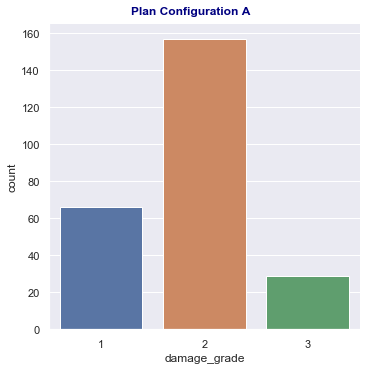

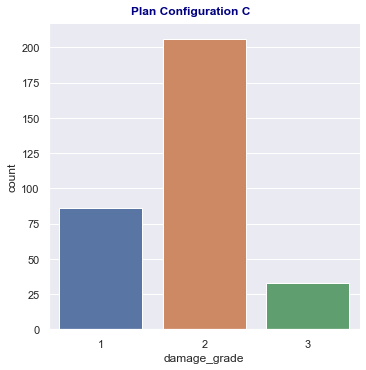

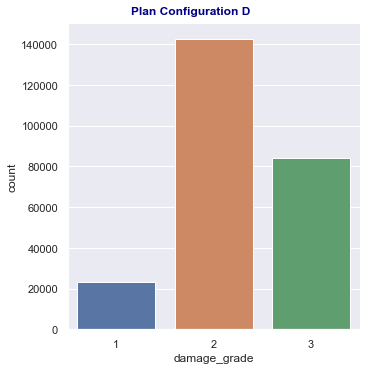

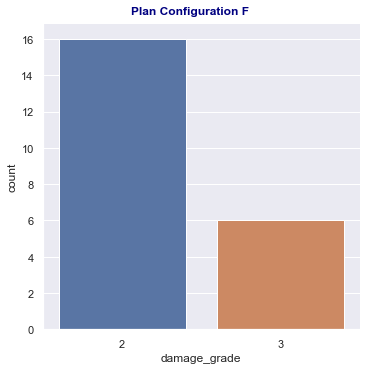

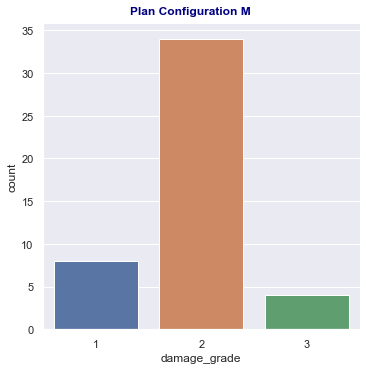

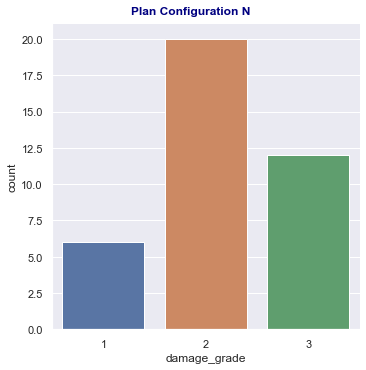

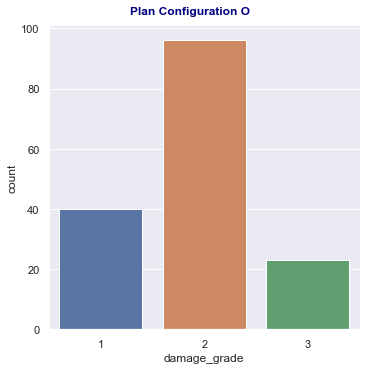

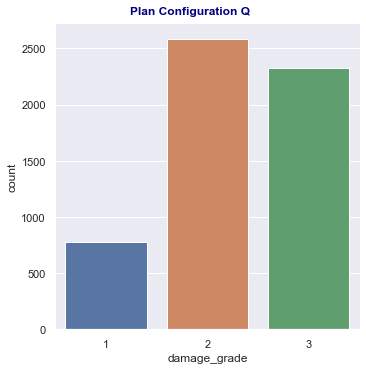

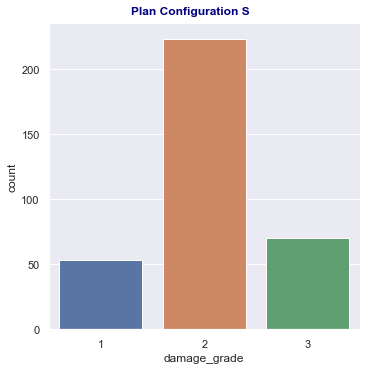

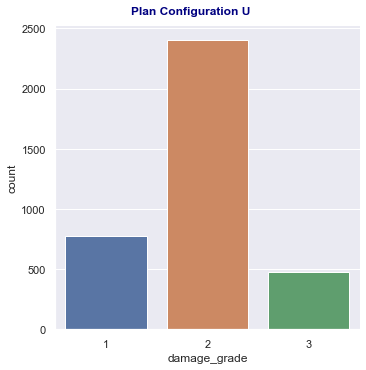

In [26]:
for x in range(0,10):
    ax = sb.catplot(x = "damage_grade", data = config_planArr[x], kind = "count",height=5)
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

#### It can be seen from the above that plan configuration d contributed to all the damage grades

## Visualization on number of families that lived in each plan configs for each damage level

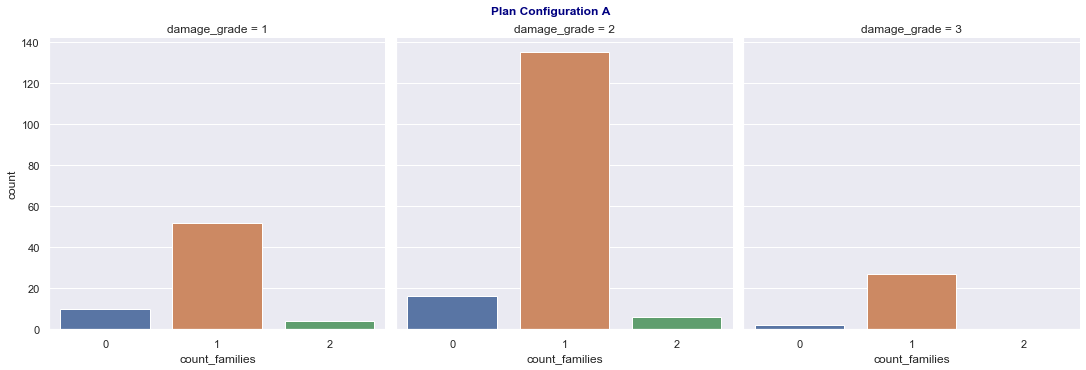

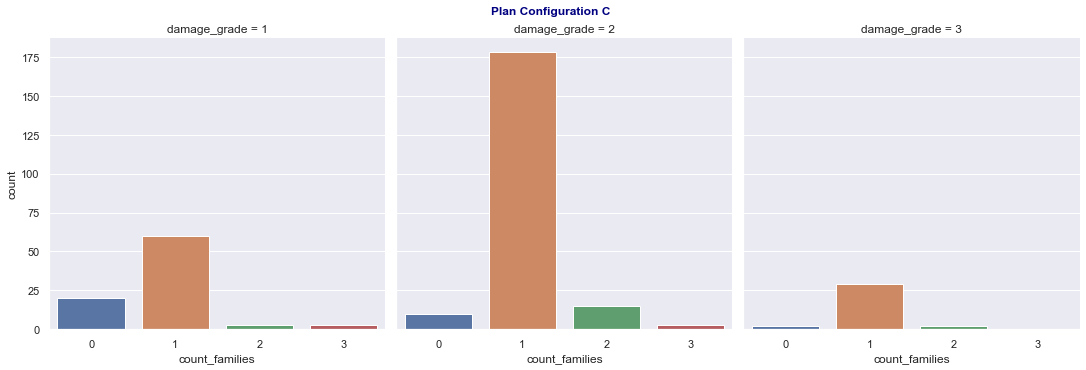

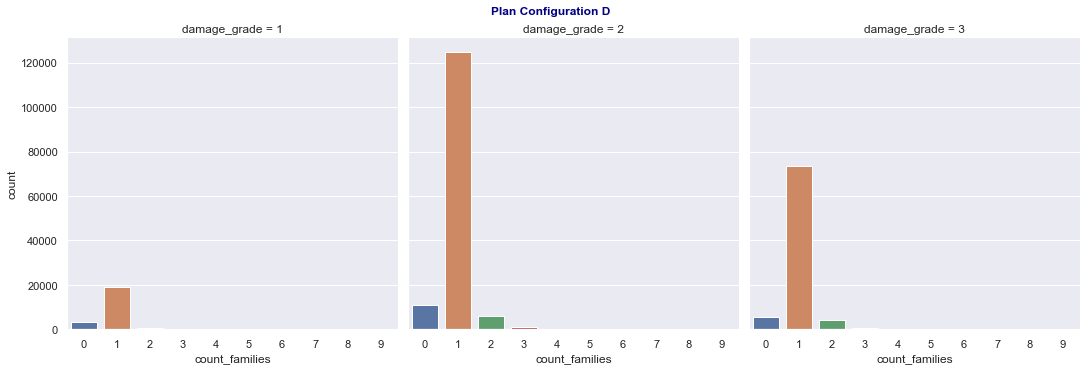

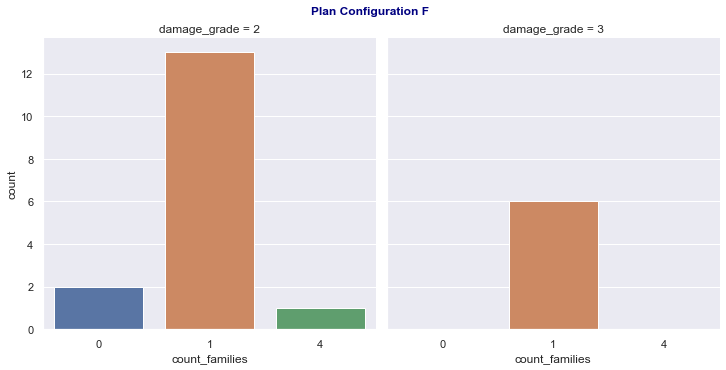

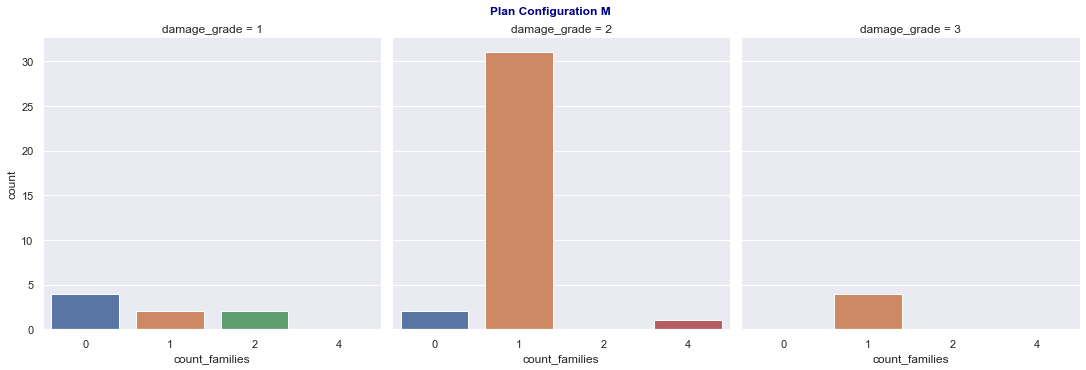

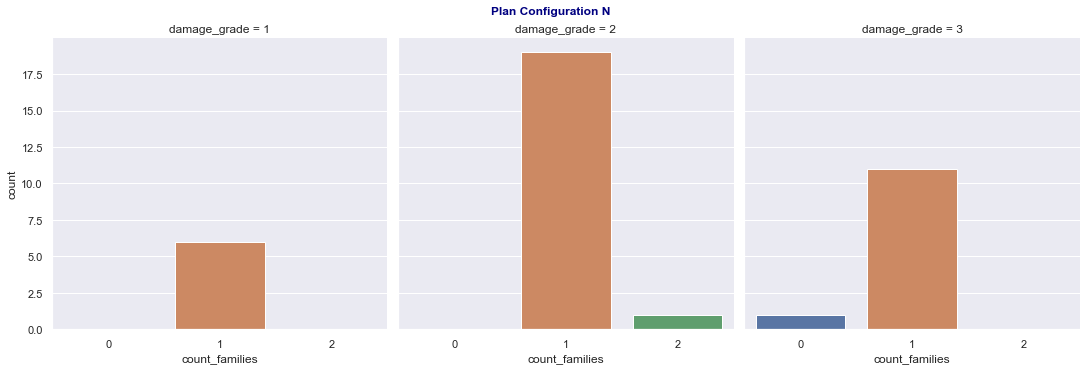

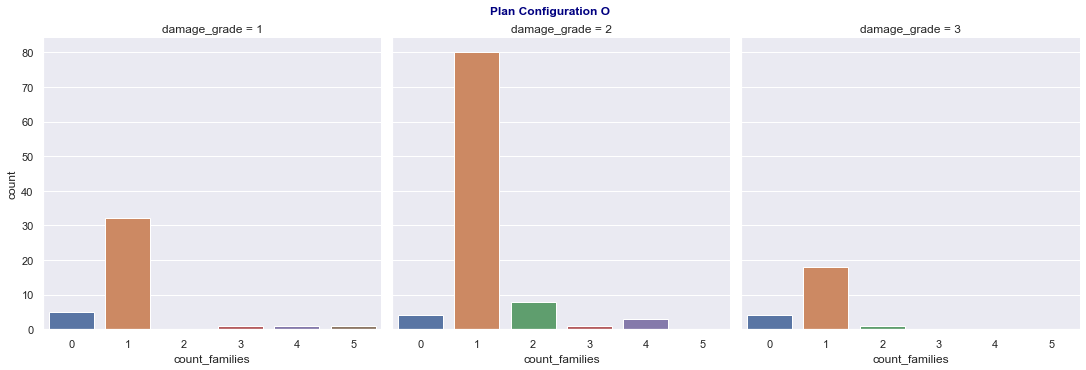

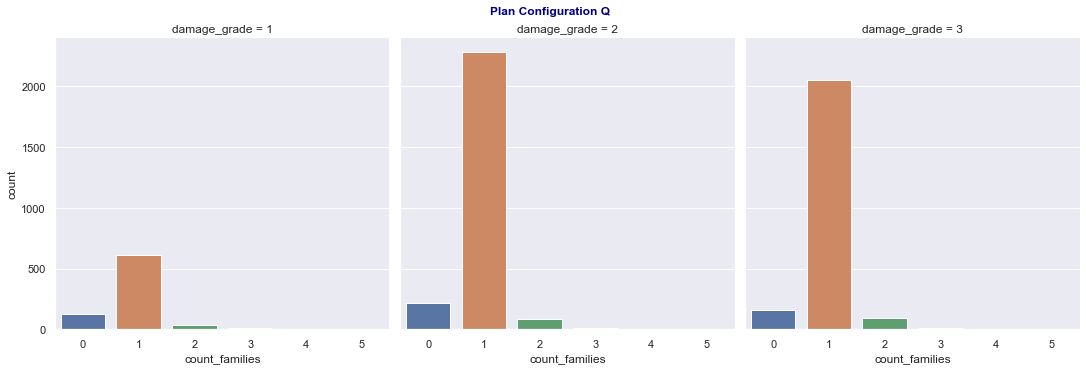

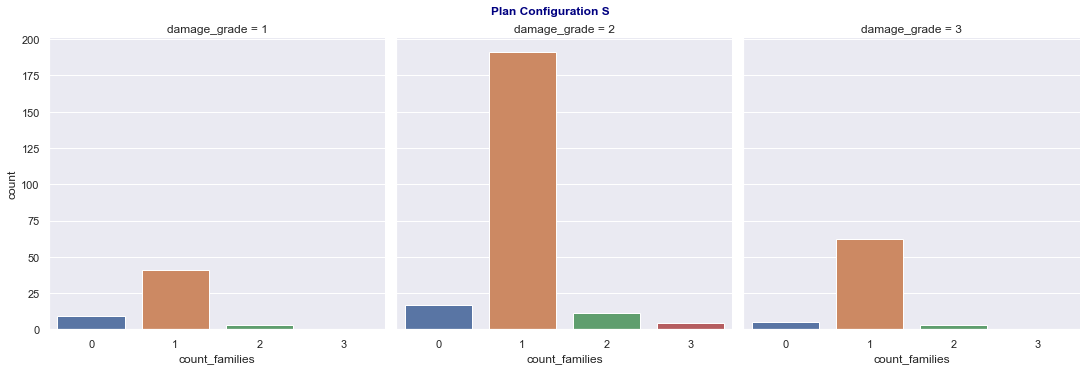

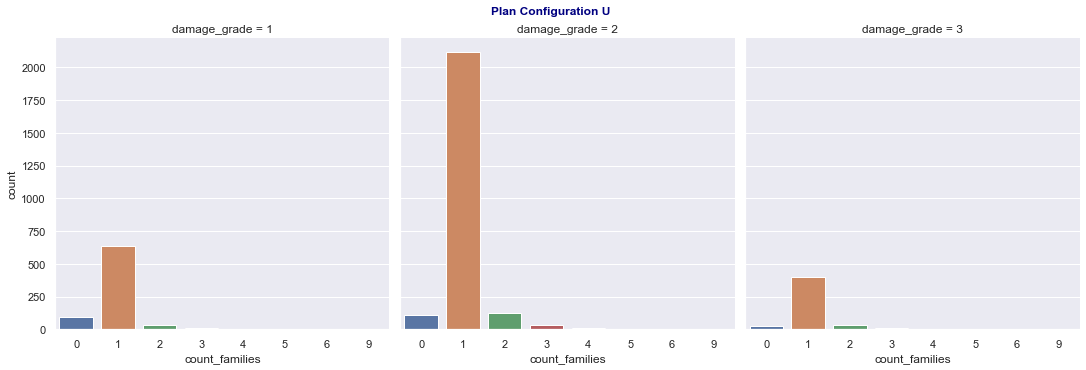

In [49]:
for x in range(0,10):
    ax=sb.catplot(x="count_families",  data=config_planArr[x],kind = 'count', col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

# Analysis on Area and Height

### Plotting area against damage grade for each plan conifgs

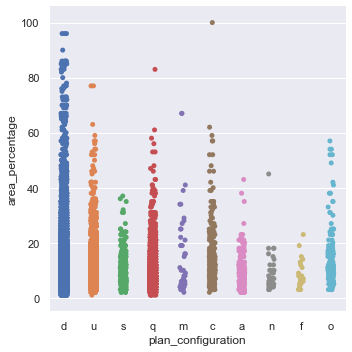

In [27]:
sb.catplot(x="plan_configuration", y = "area_percentage", data=combined_data)

### Plotting height against damage grade for each plan conifgs

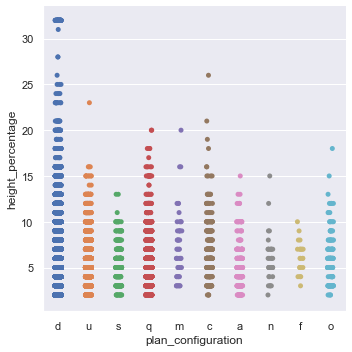

In [28]:
sb.catplot(x="plan_configuration", y = "height_percentage", data=combined_data)

### Plotting area vs height against damage grade for each plan conifgs

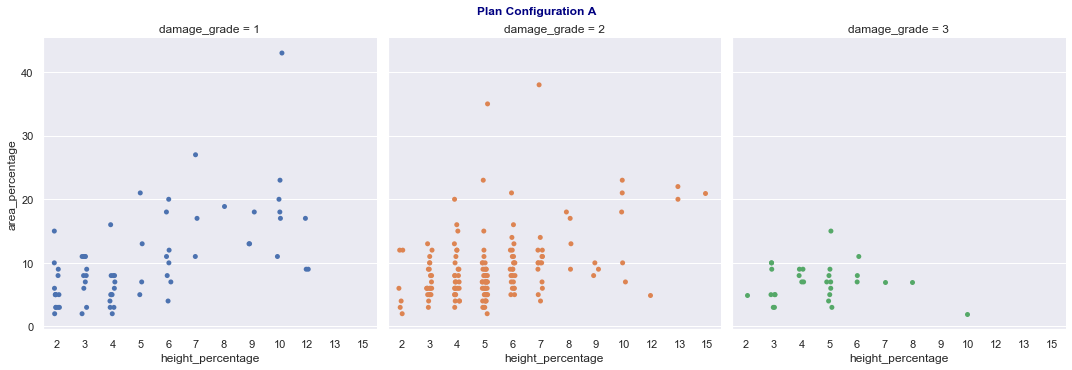

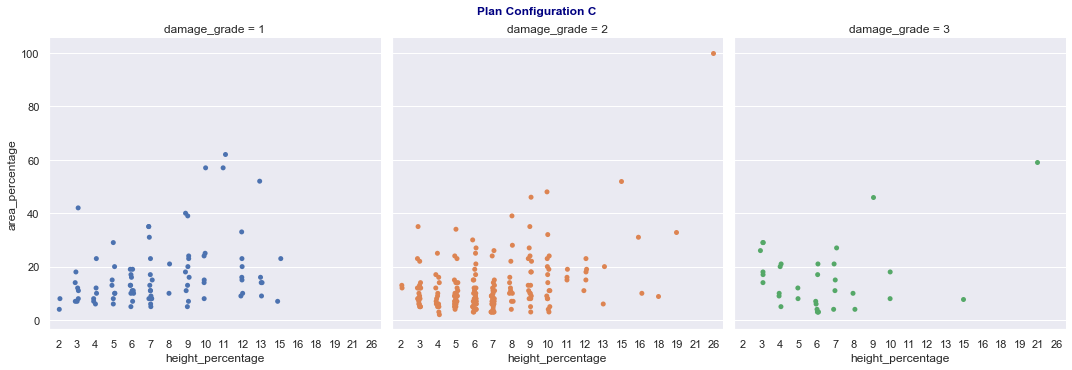

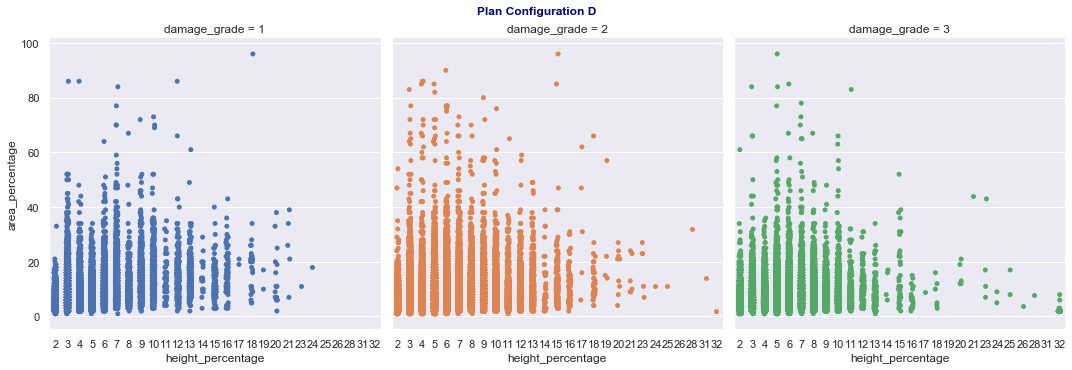

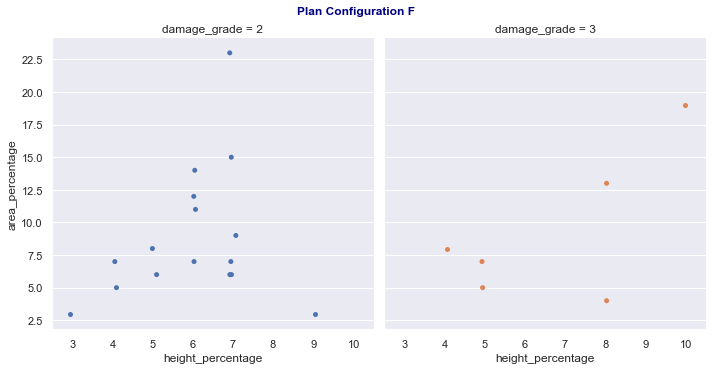

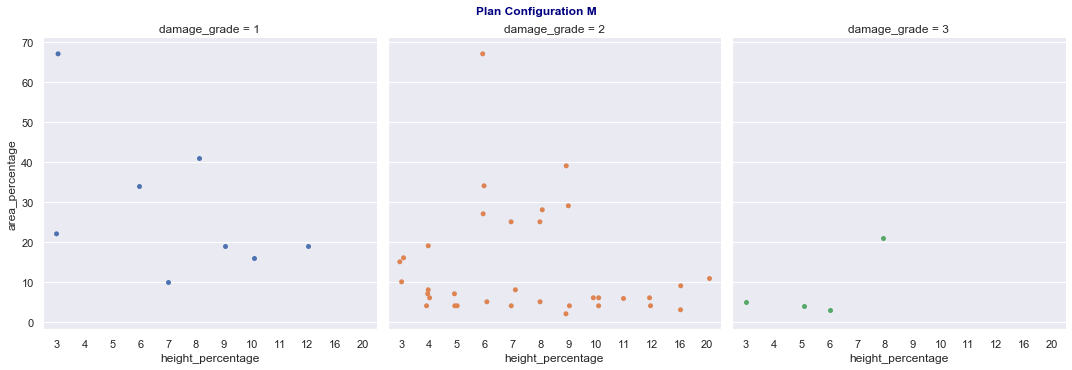

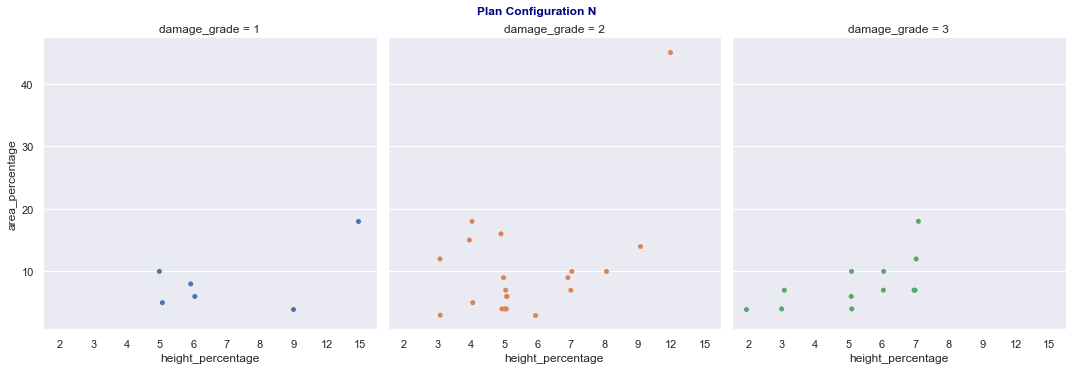

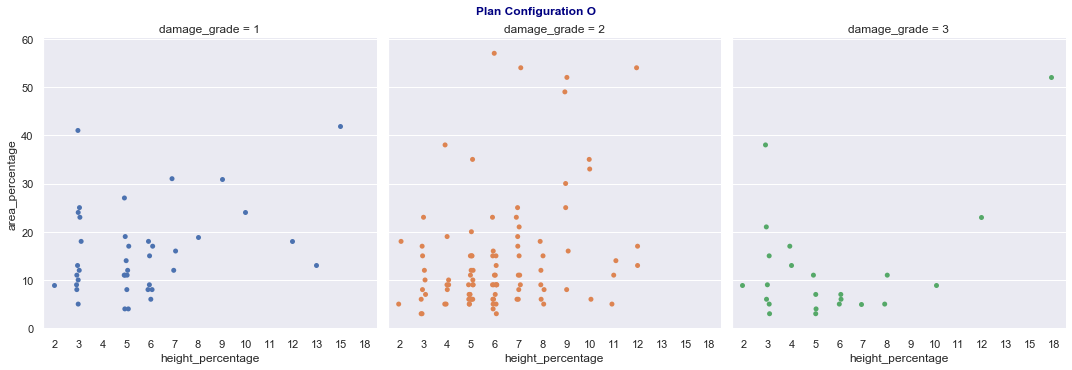

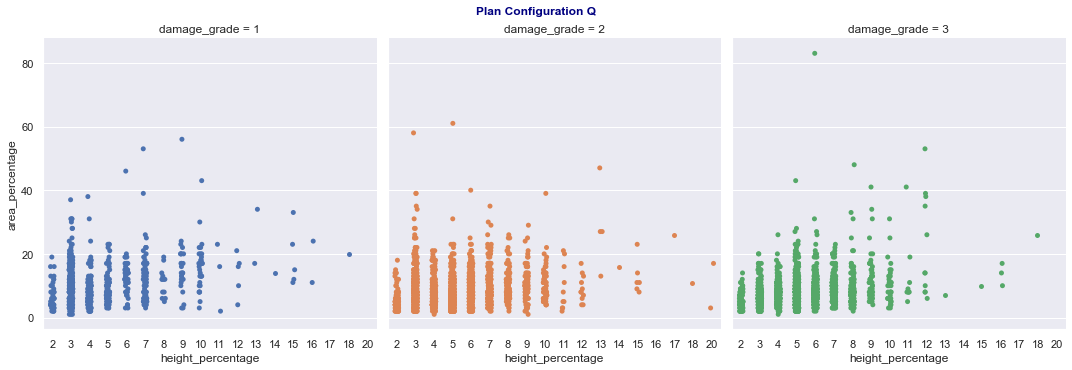

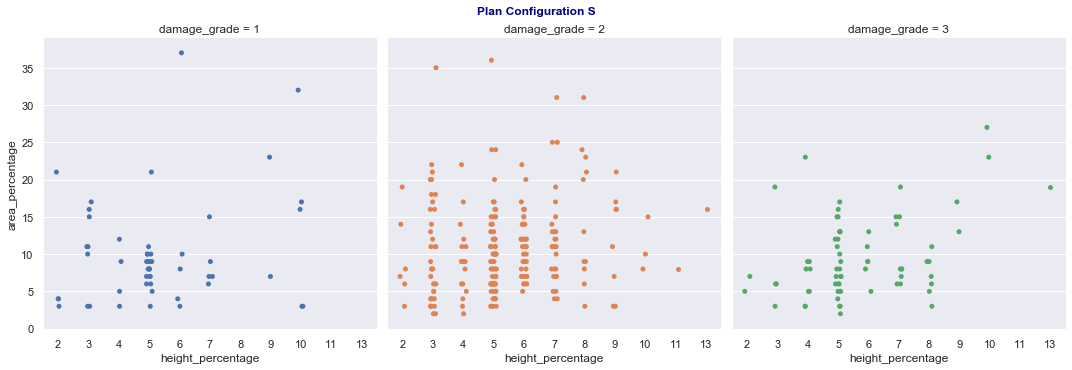

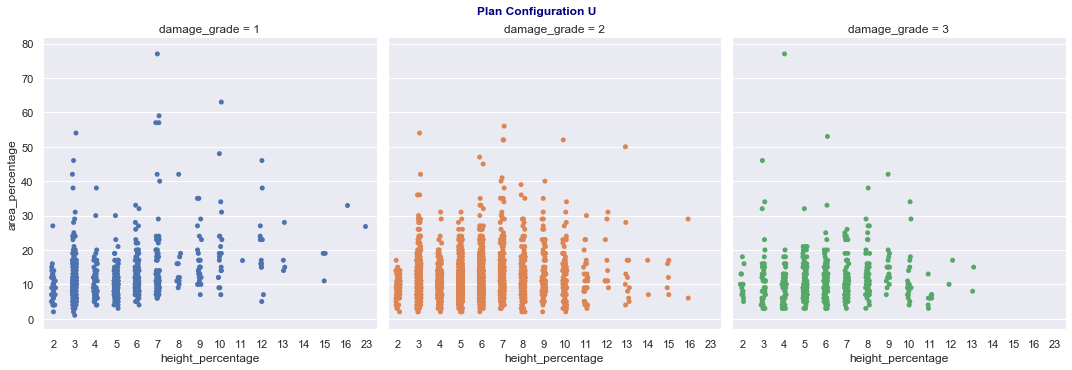

In [29]:
for x in range(0,10):
    ax = sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=config_planArr[x],col="damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

# Analysis on number of floors

###  Visualize the number of floors for each plan configs

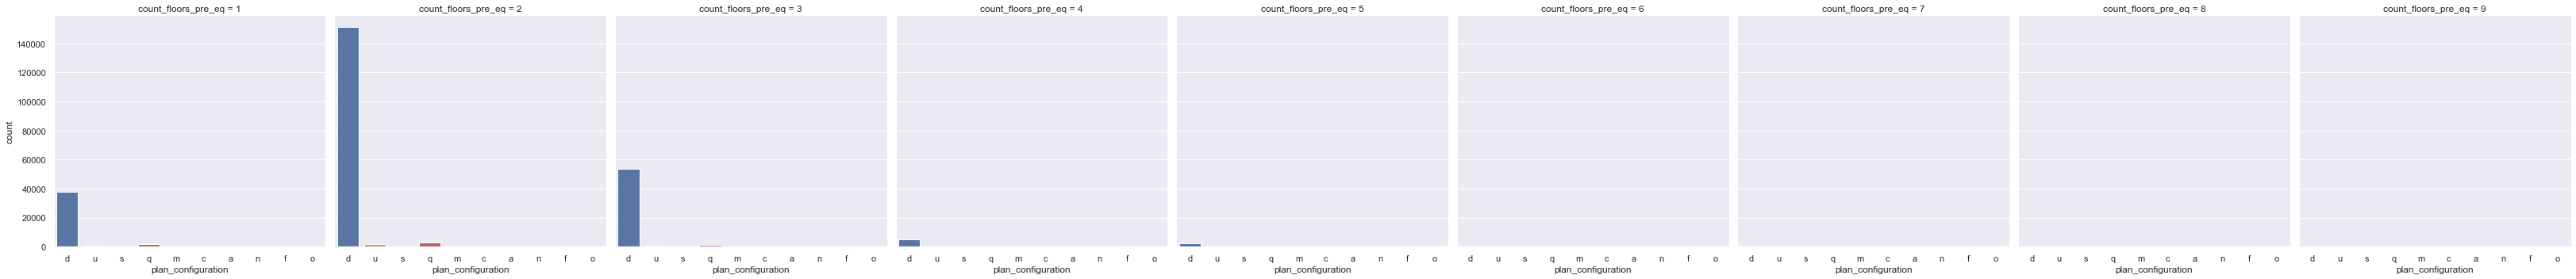

In [36]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "count_floors_pre_eq")

###  Check if the number of floors has an impact on the damage grade for each plan conifgs

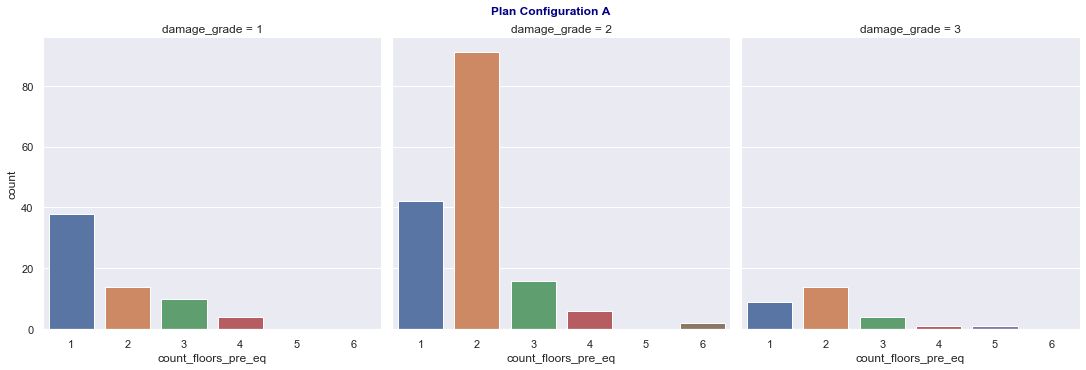

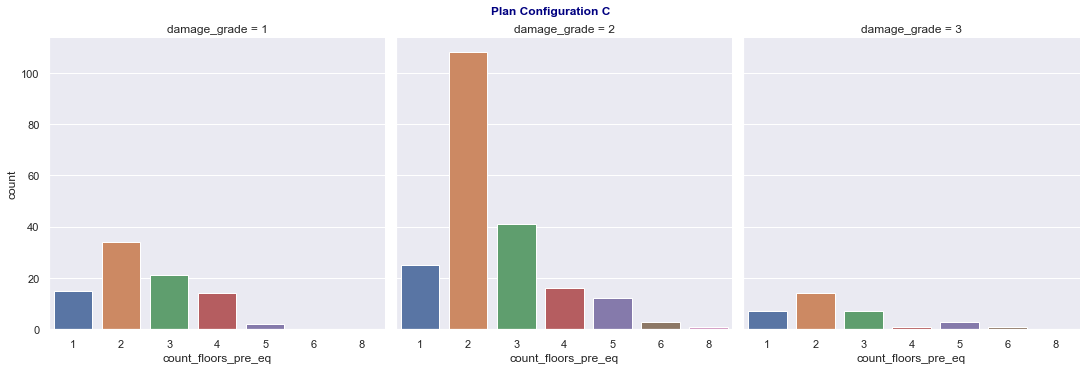

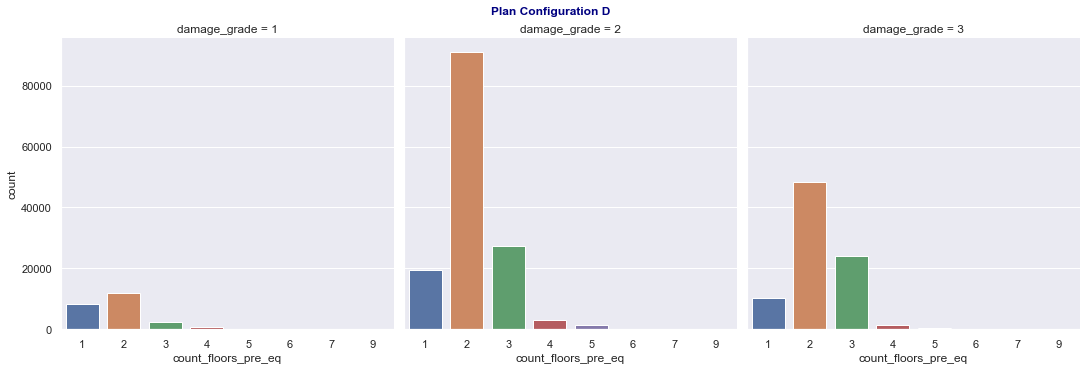

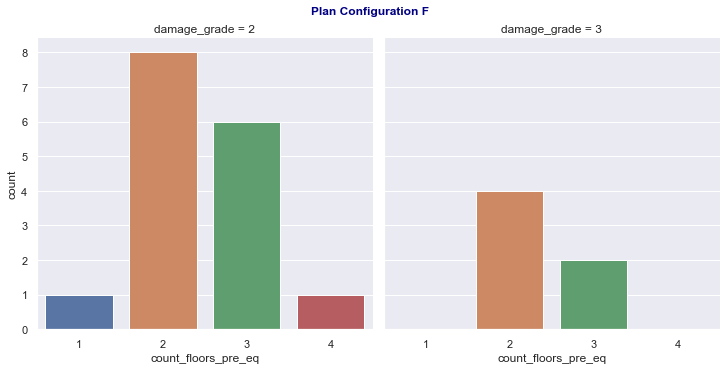

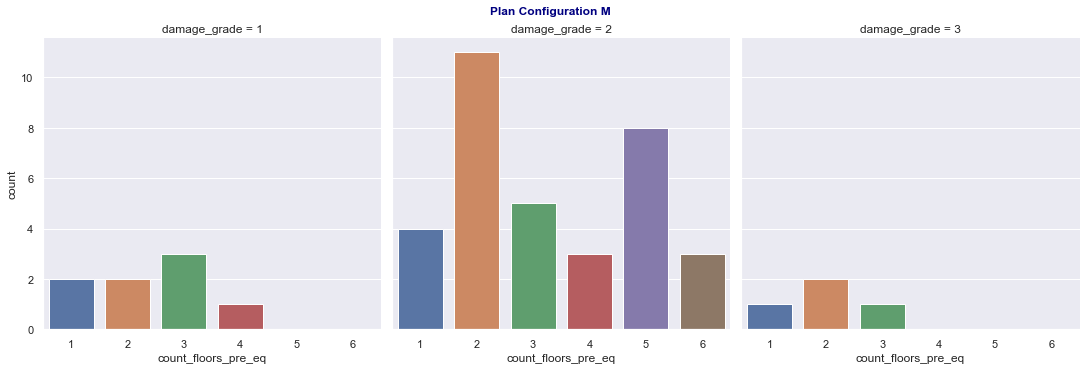

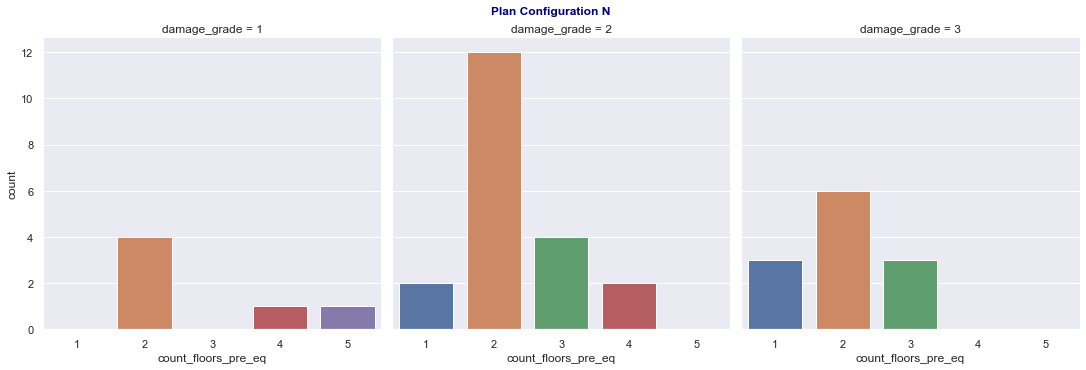

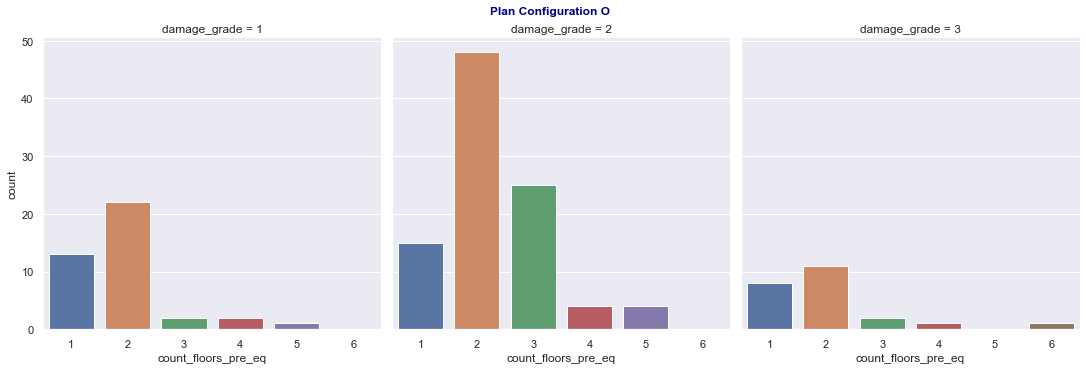

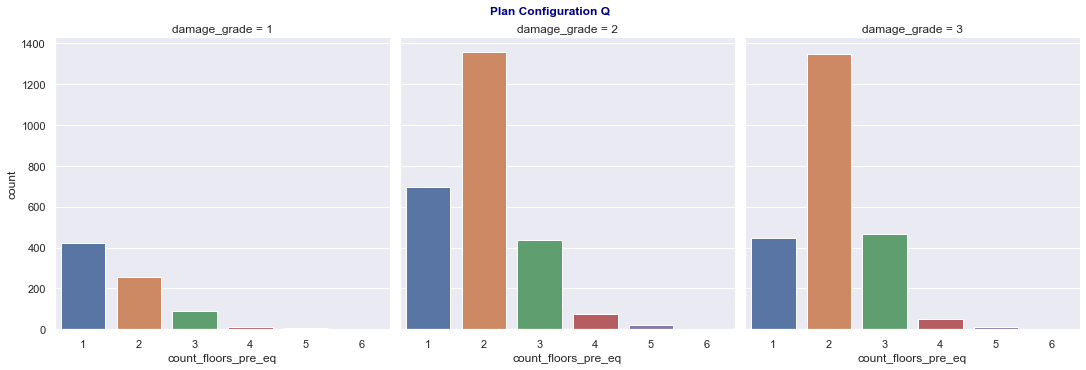

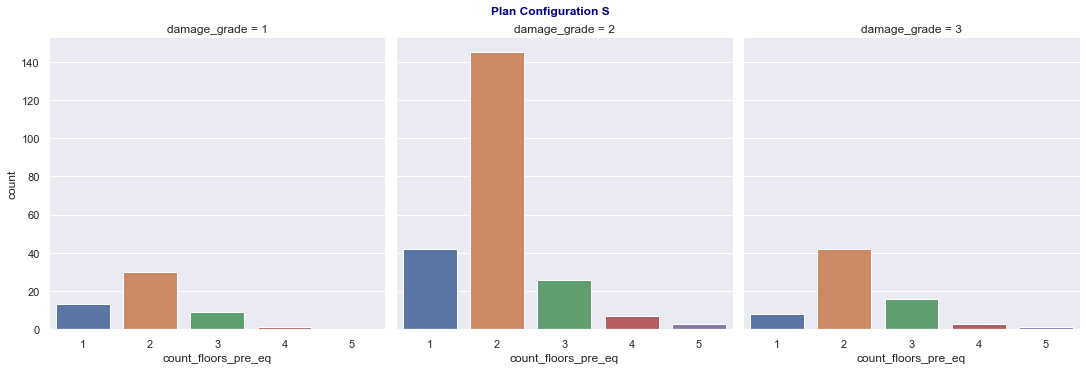

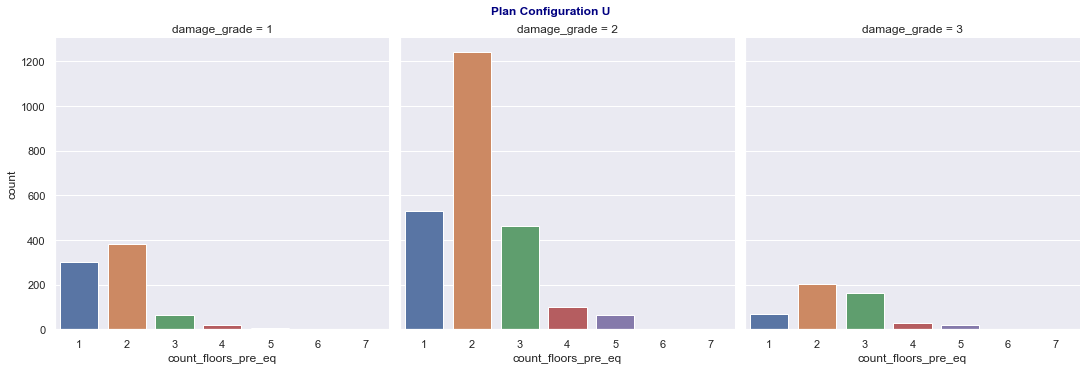

In [31]:
for x in range(0,10):
    ax = sb.catplot(x = "count_floors_pre_eq", data = config_planArr[x], kind = "count",height=5, col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

# Analysis on land suface condition

###  Visualize the land surface condition for each plan configs

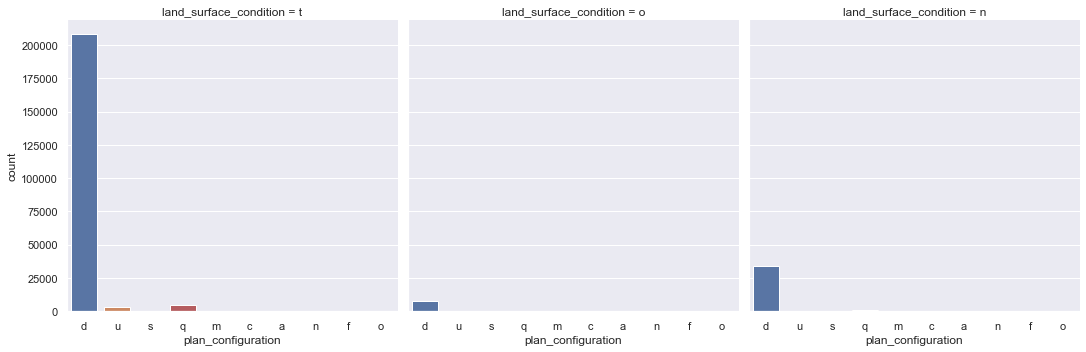

In [42]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "land_surface_condition")

###  Check if the  land surface condition has an impact on the damage grade for each plan conifgs

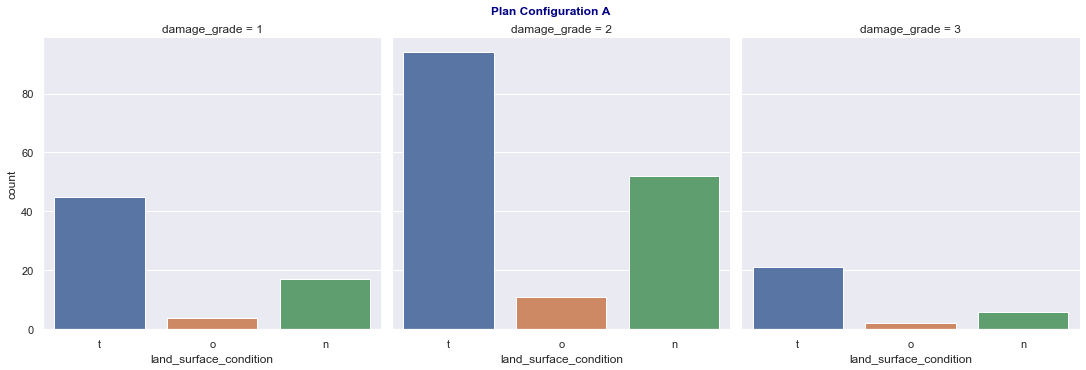

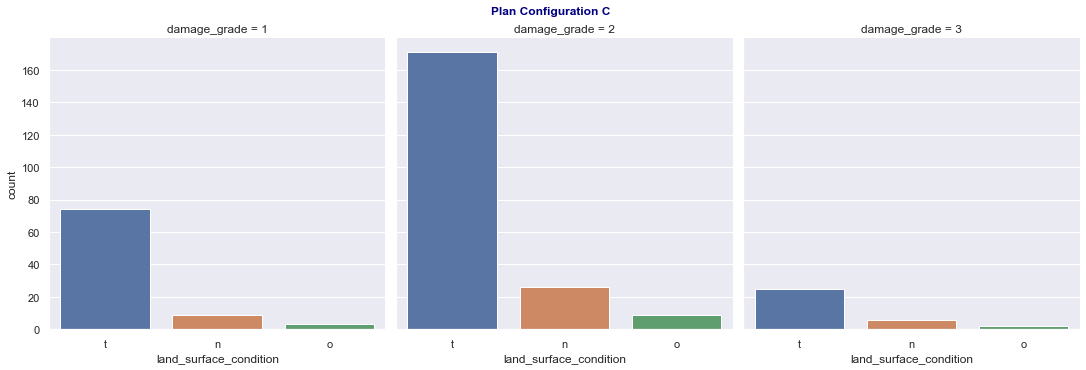

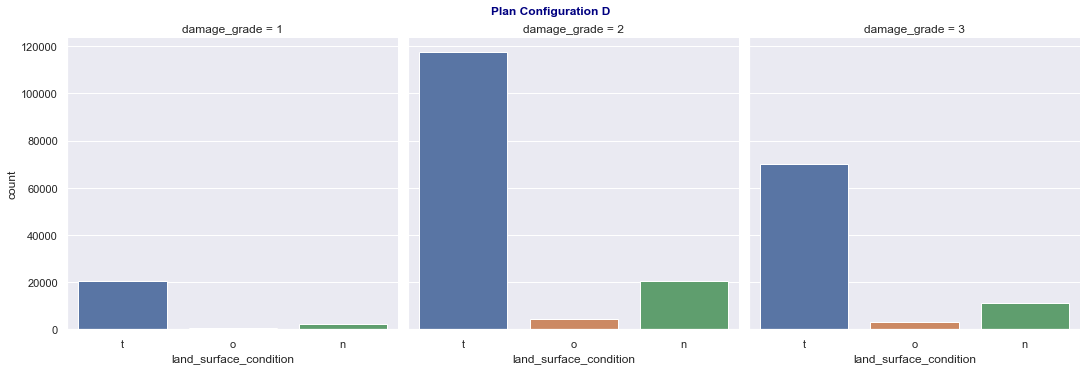

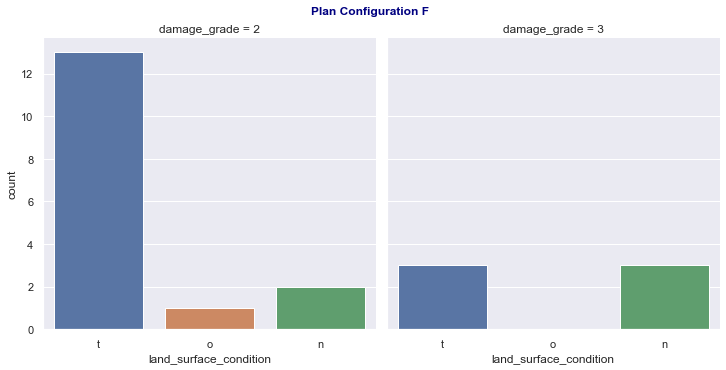

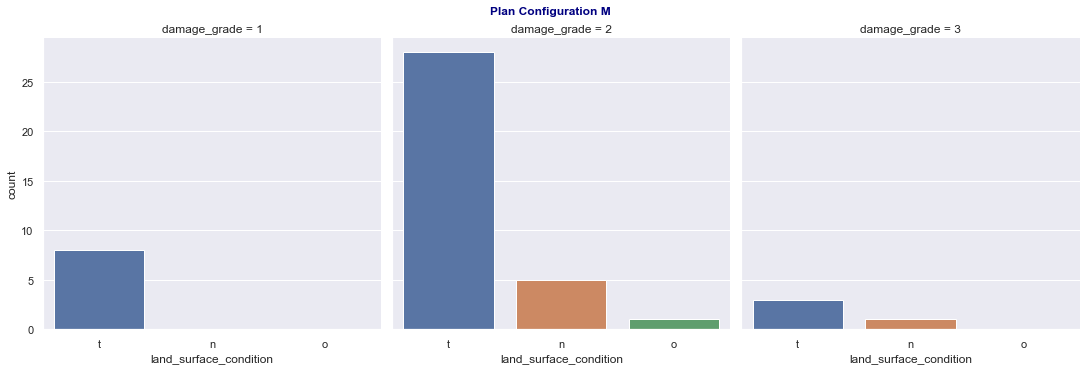

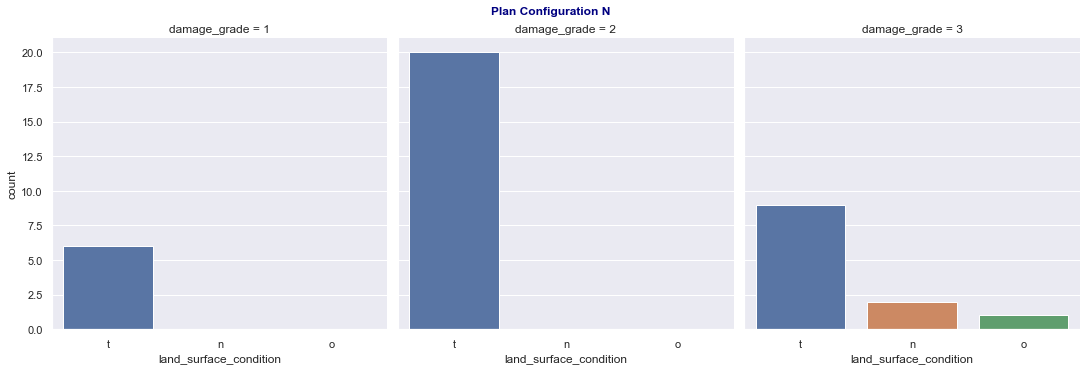

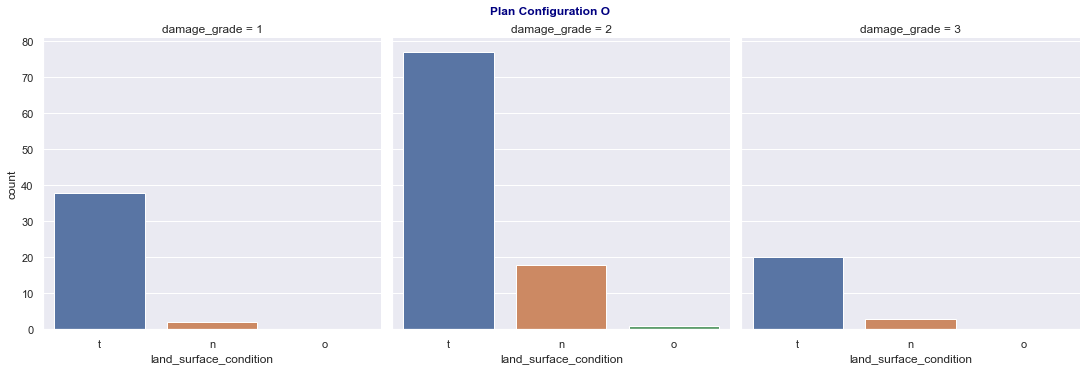

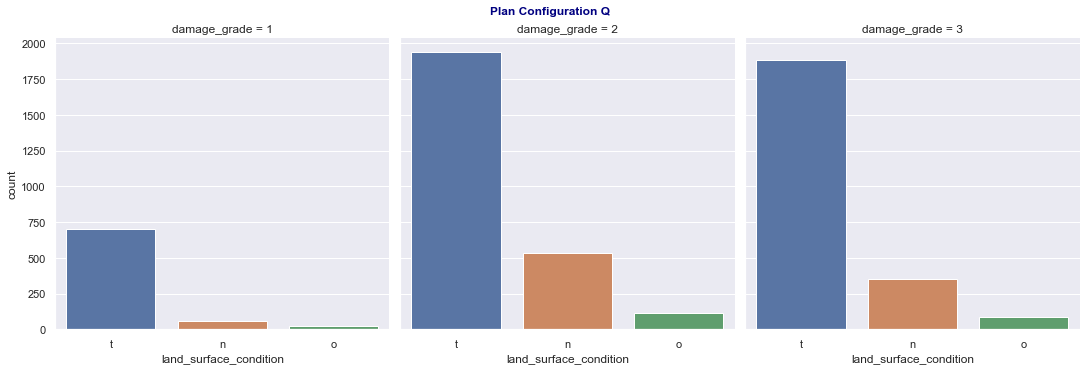

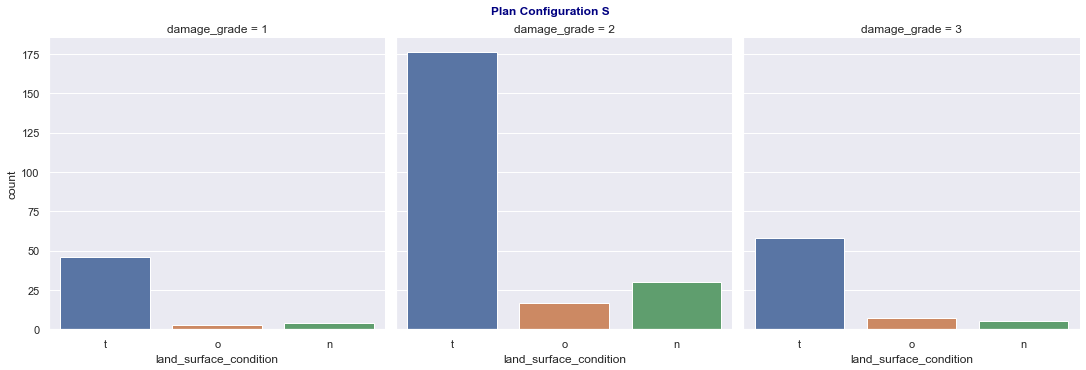

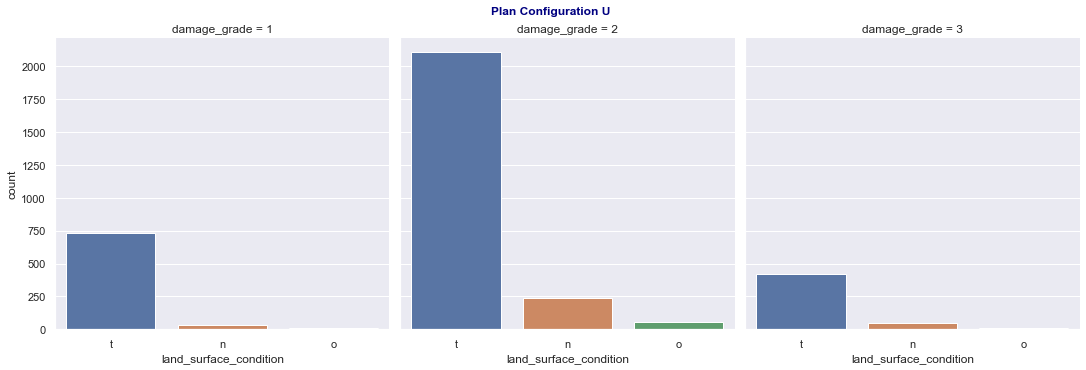

In [43]:
for x in range(0,10):
    ax = sb.catplot(x = "land_surface_condition", data = config_planArr[x], kind = "count",height=5, col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

# Analysis on position

###  Visualize the positons for each plan configs

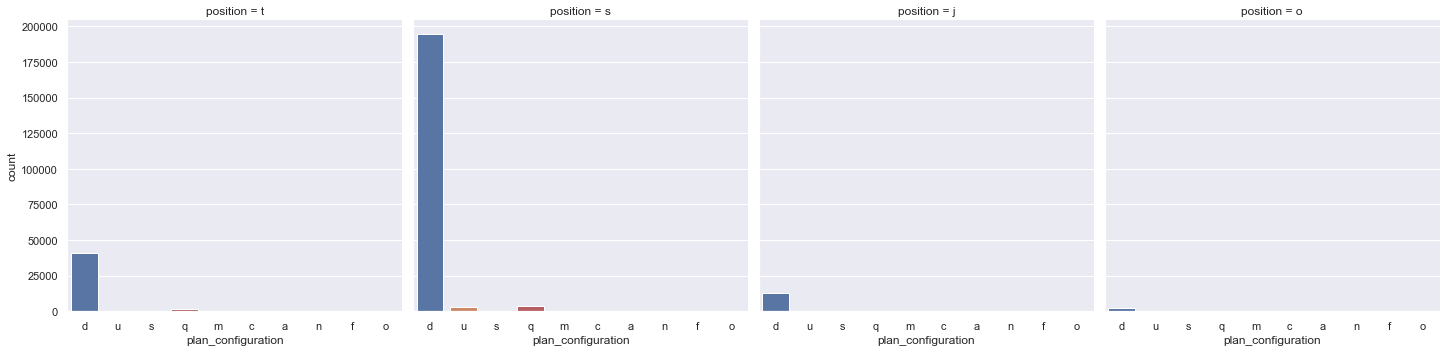

In [38]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "position")

###  Check if the position has an impact on the damage grade for each plan conifgs

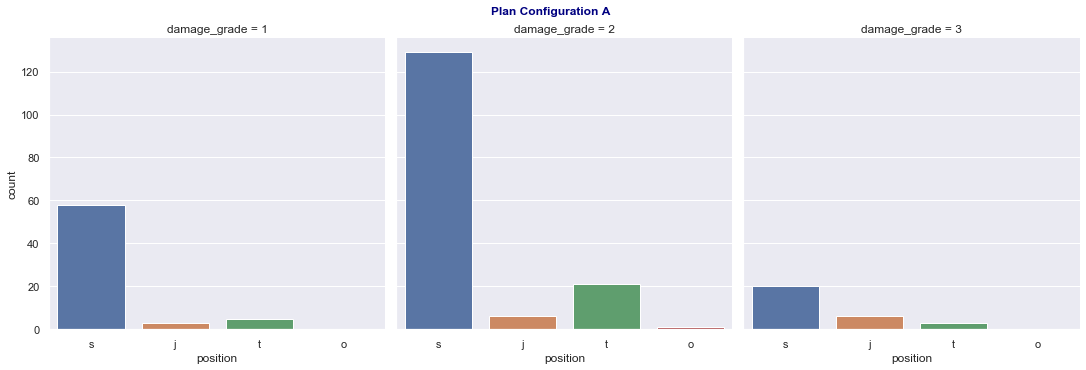

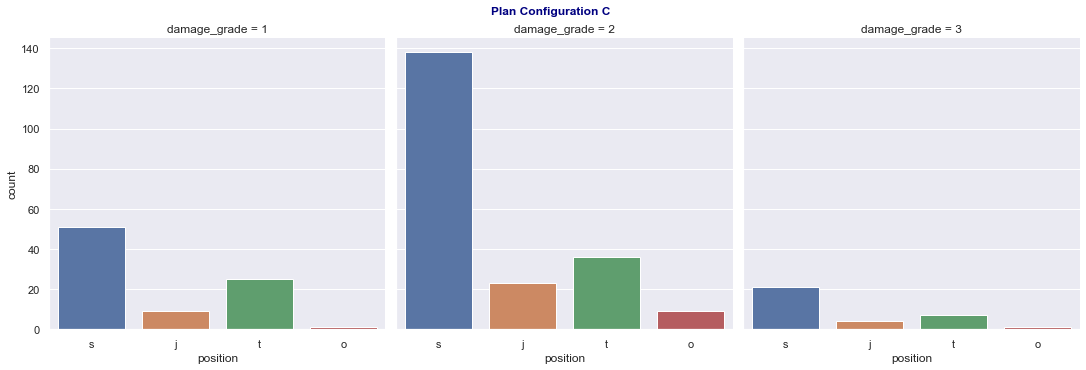

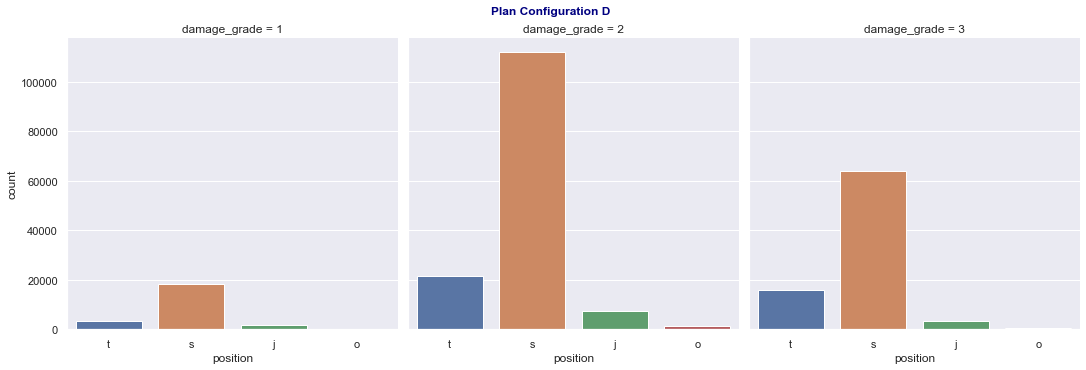

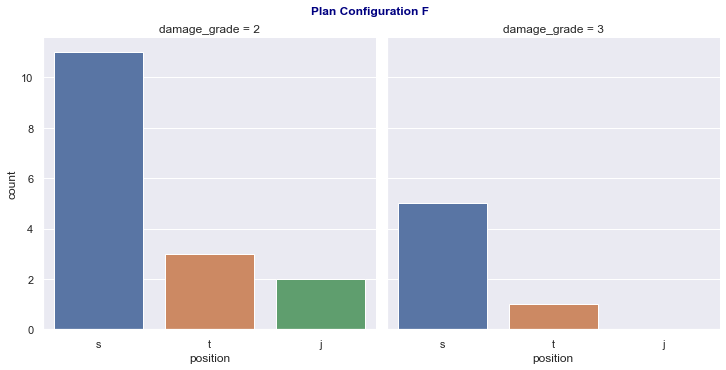

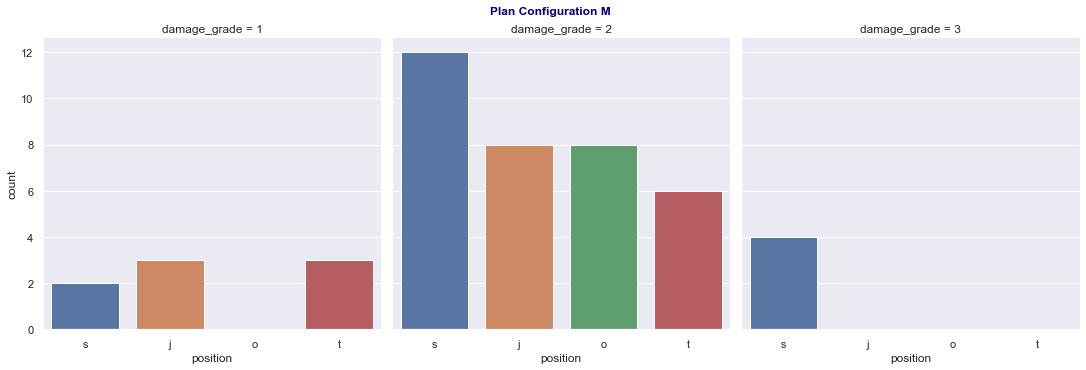

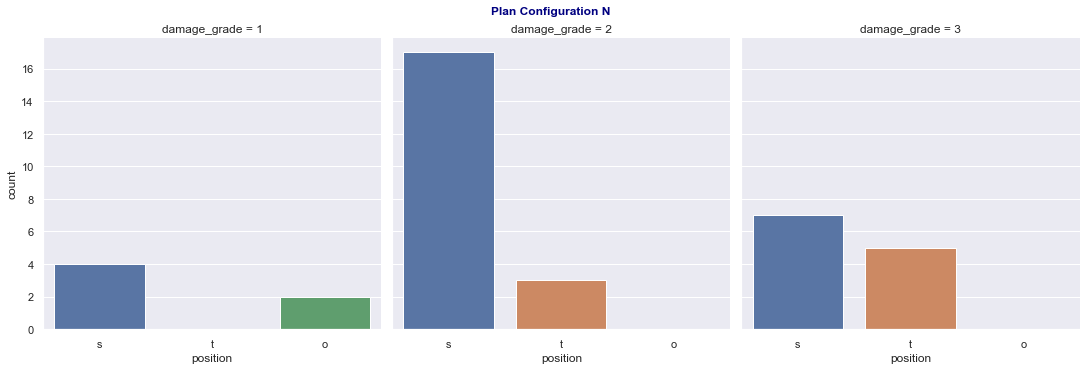

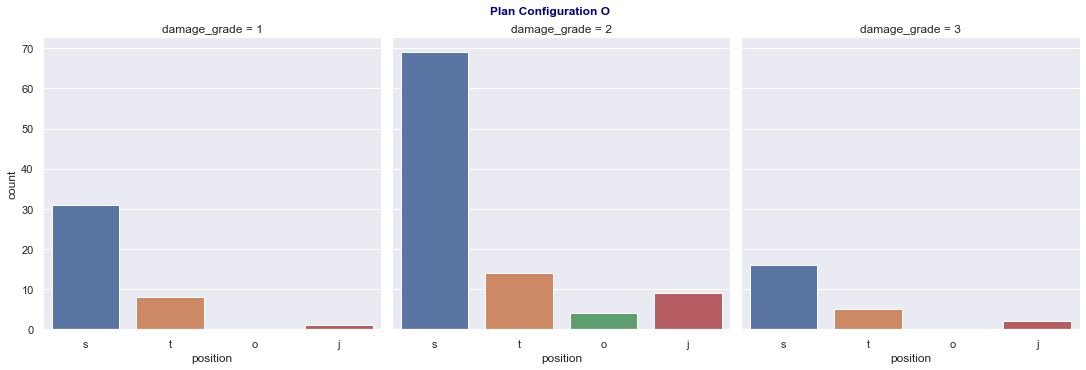

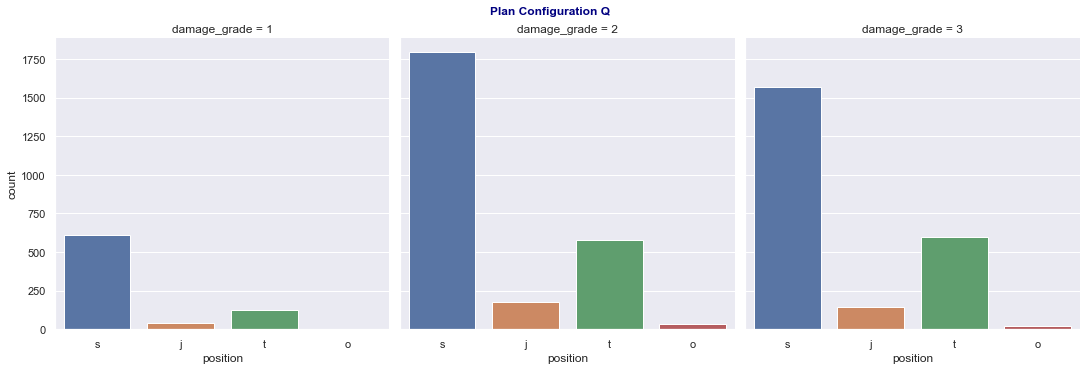

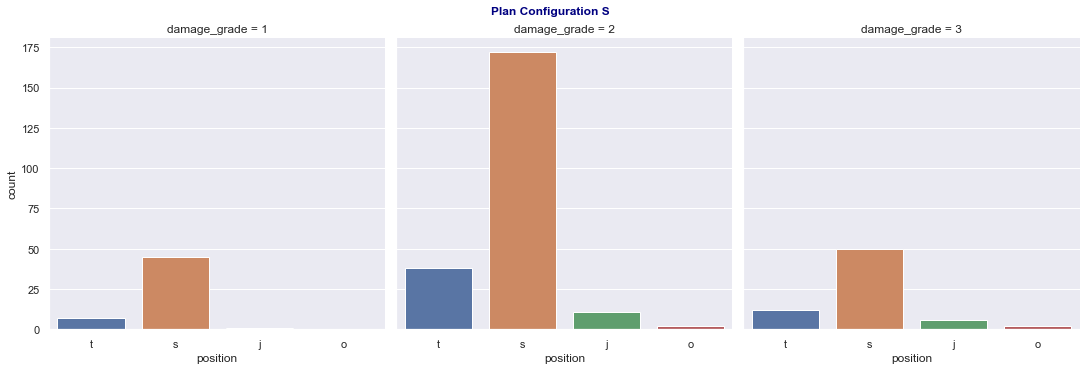

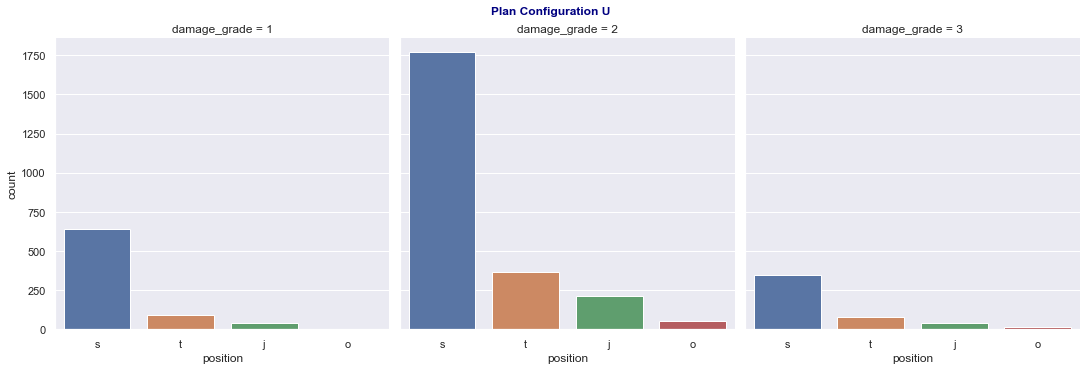

In [37]:
for x in range(0,10):
    ax = sb.catplot(x = "position", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

# Analysis on ground floor type

###  Visualize the ground floor type for each plan configs

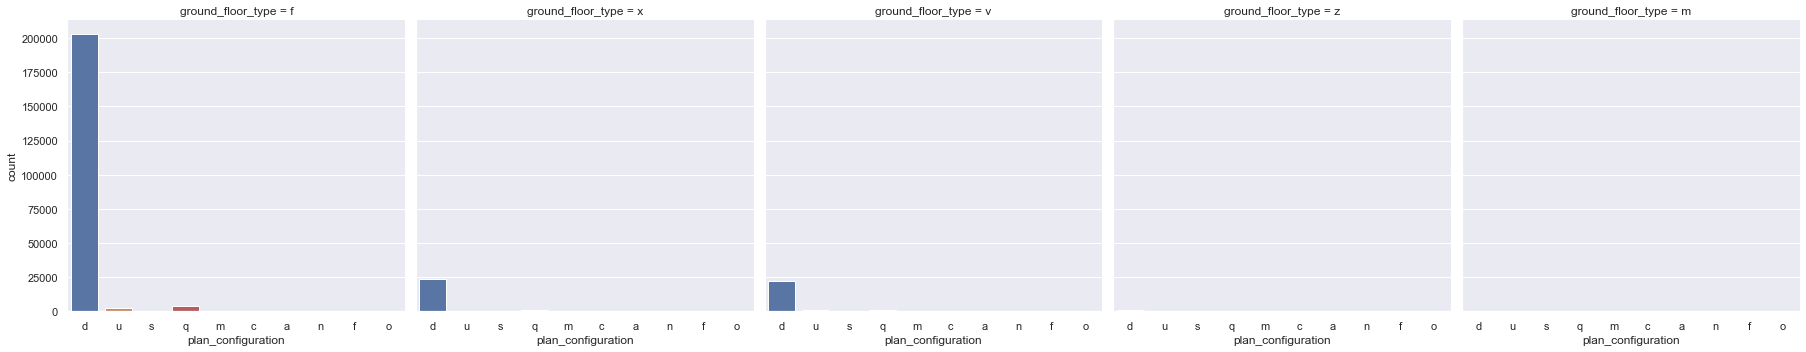

In [16]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "ground_floor_type")

###  Check if the ground floor type has an impact on the damage grade for each plan conifgs

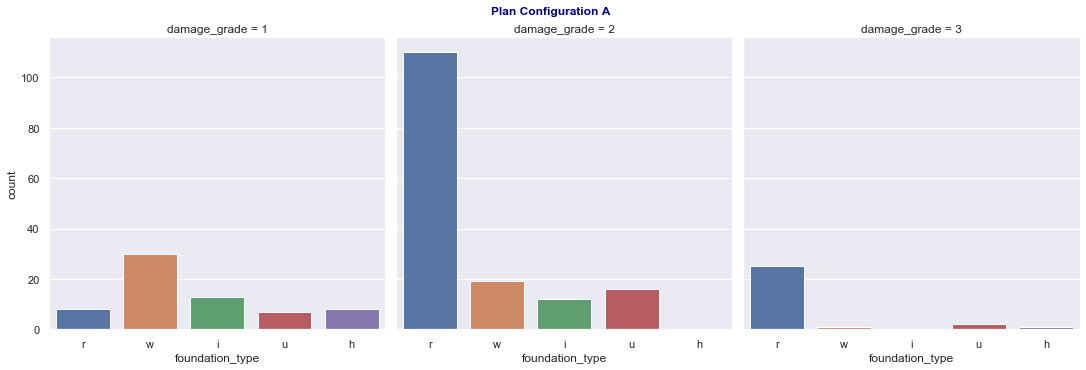

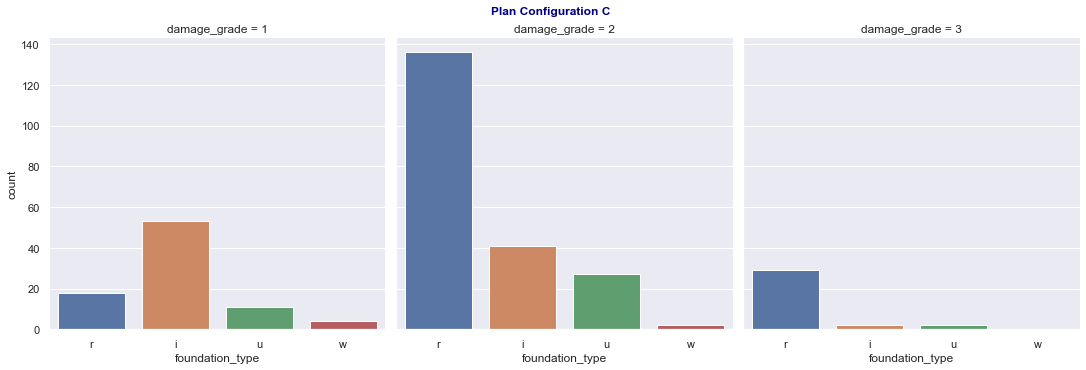

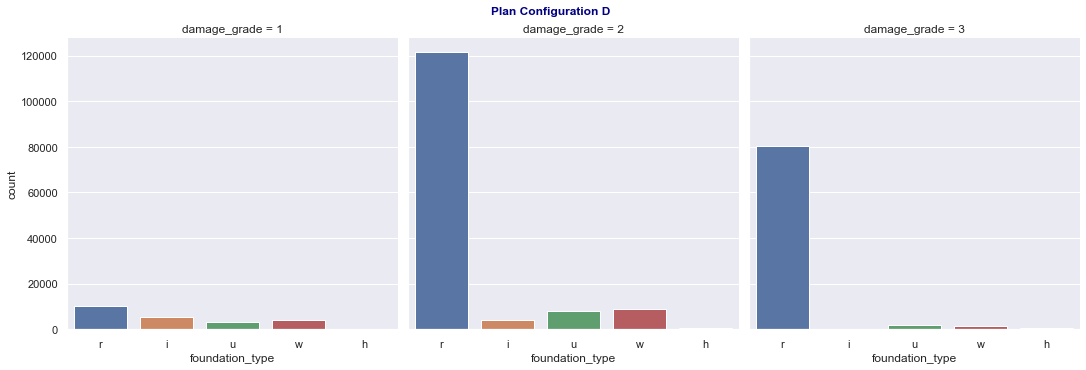

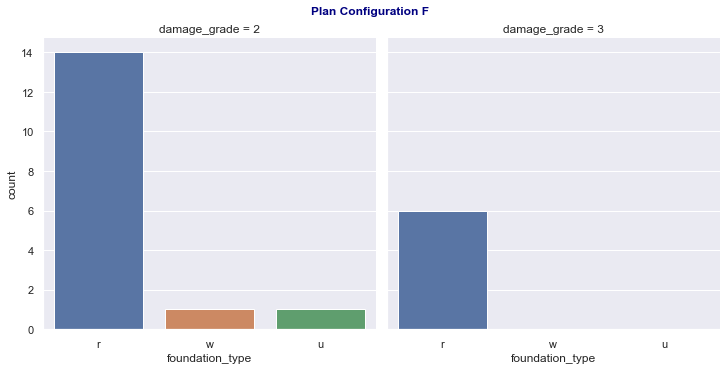

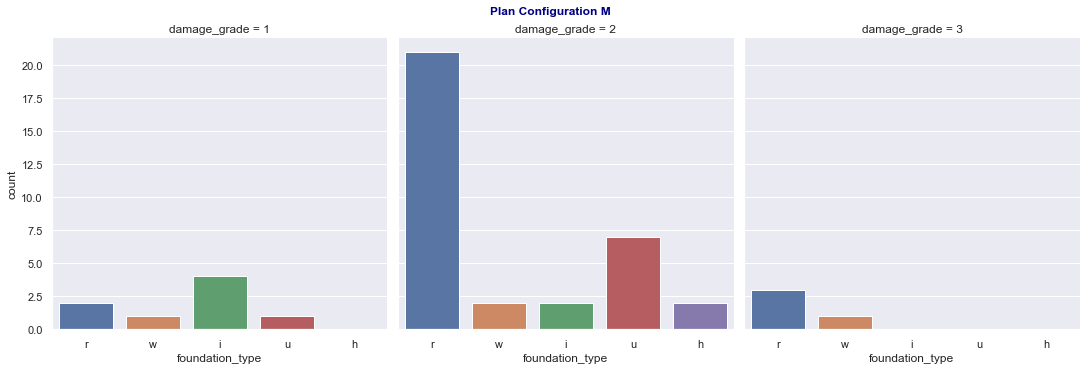

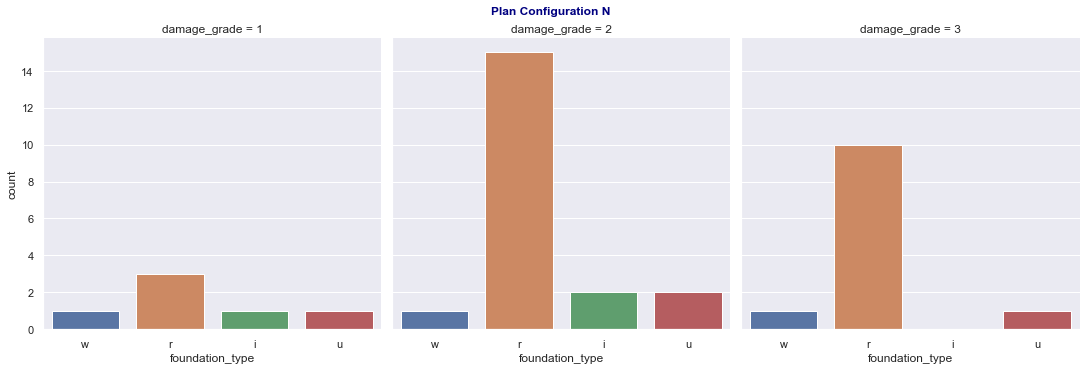

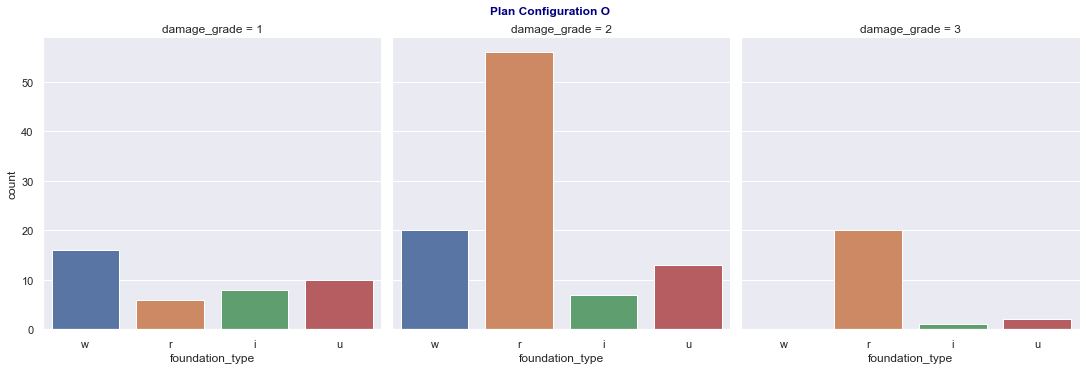

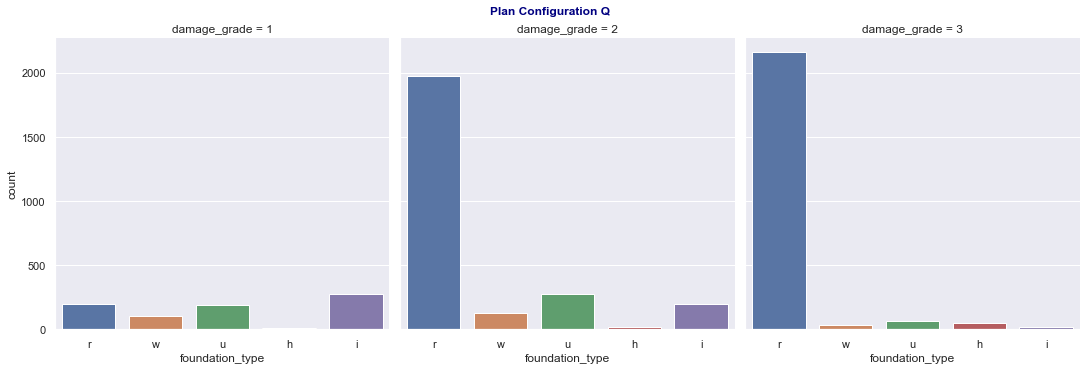

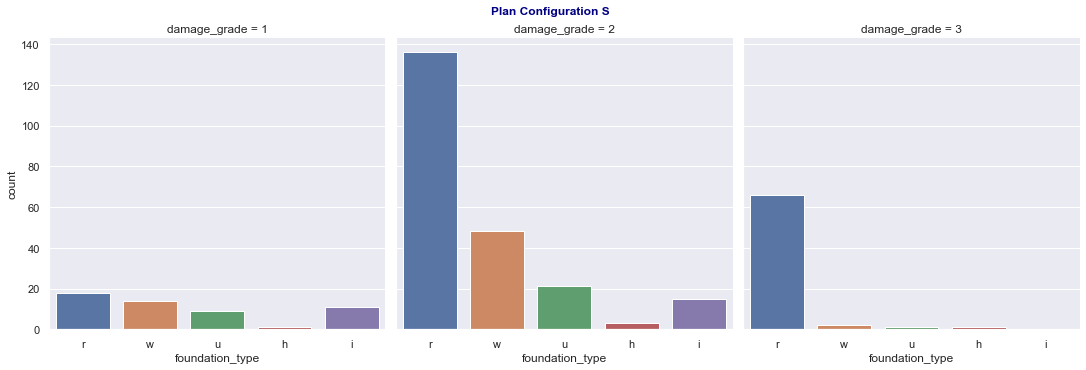

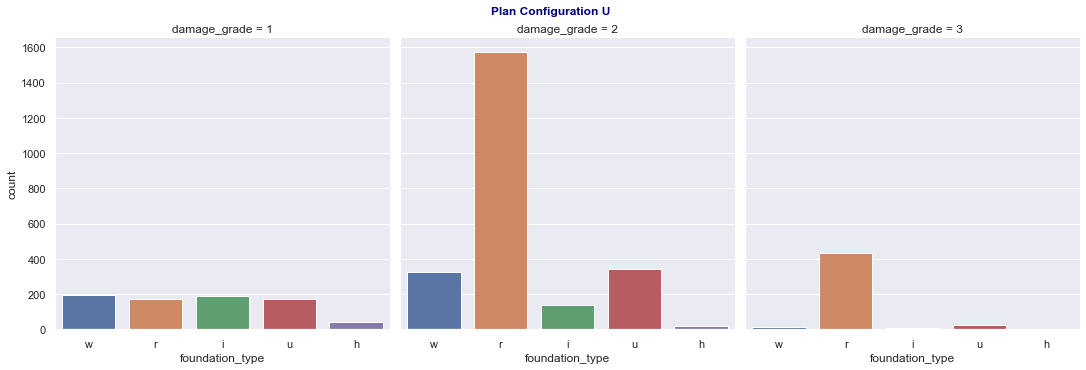

In [34]:
for x in range(0,10):
    ax = sb.catplot(x = "foundation_type", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

# Analysis on roof type

####  Visualize the roof type for each plan configs

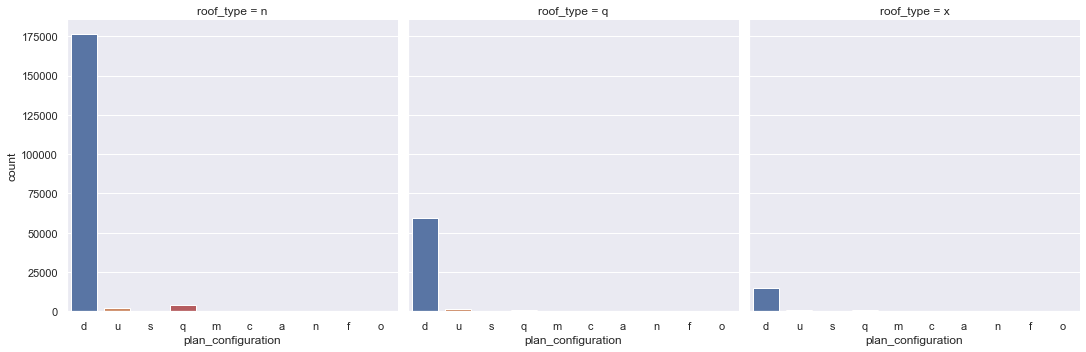

In [17]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "roof_type")

###  Check if the foundation type has an impact on the damage grade for each plan conifgs

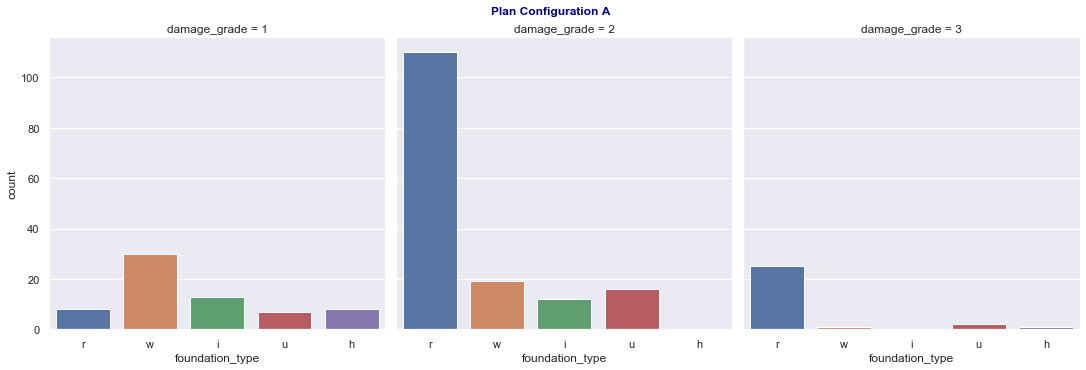

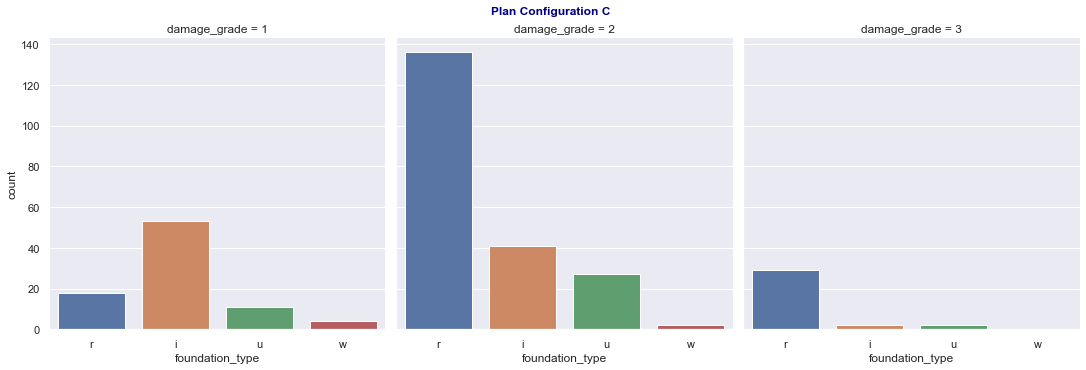

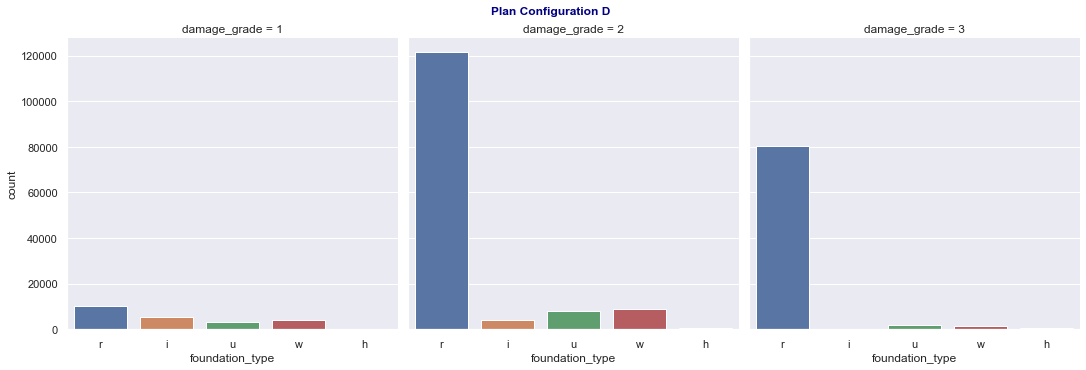

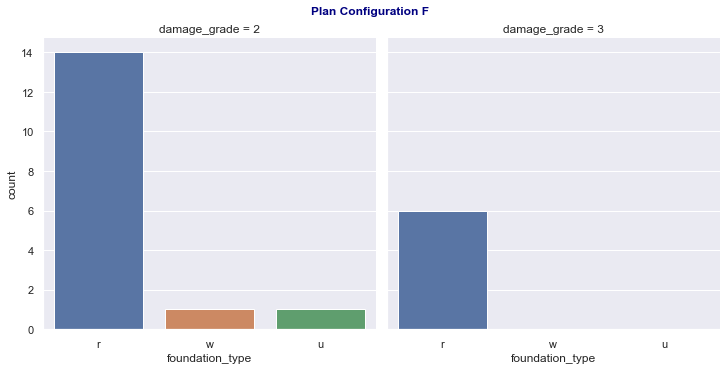

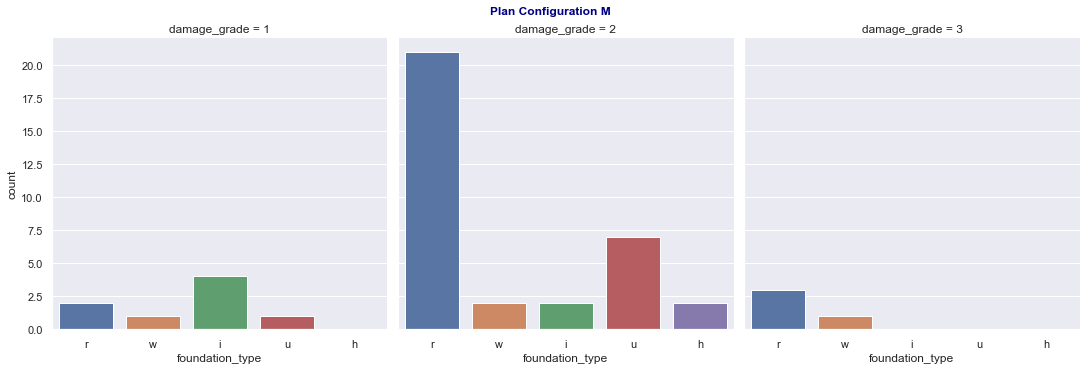

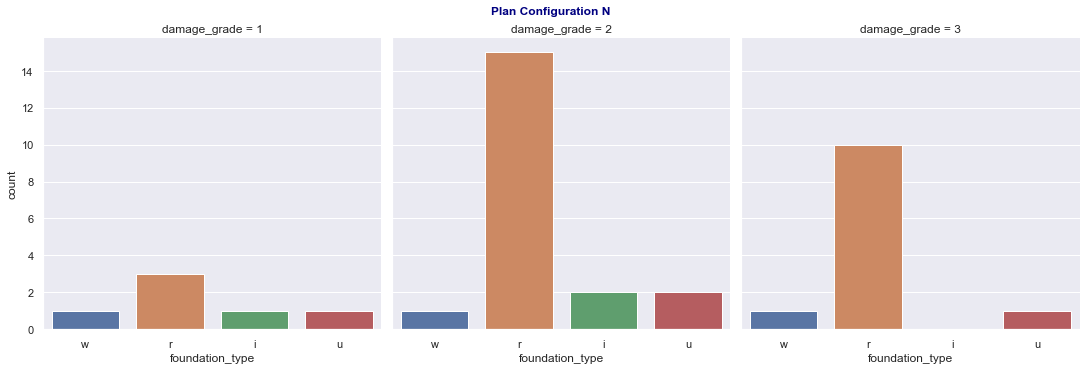

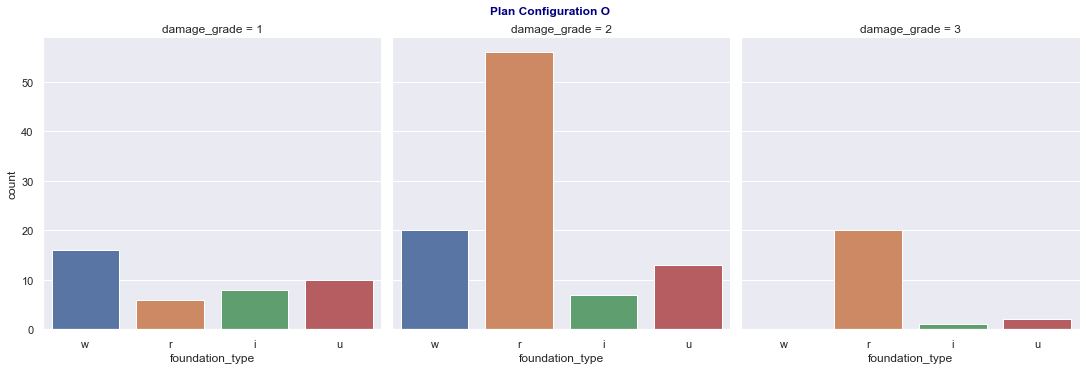

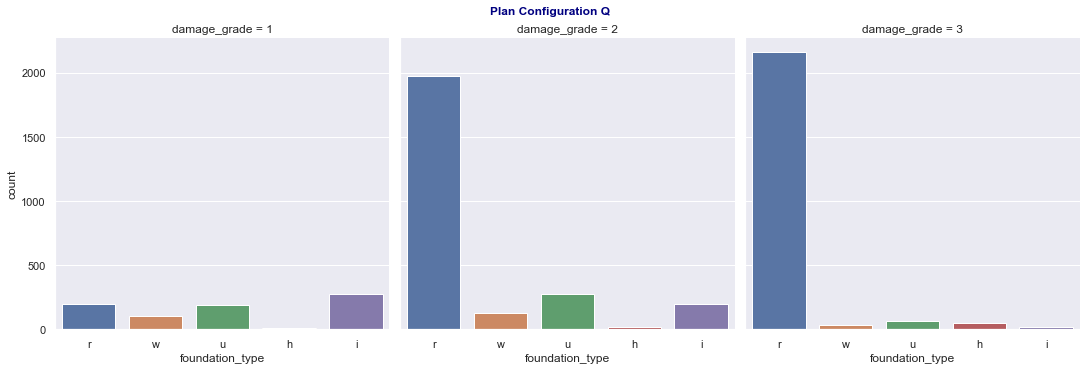

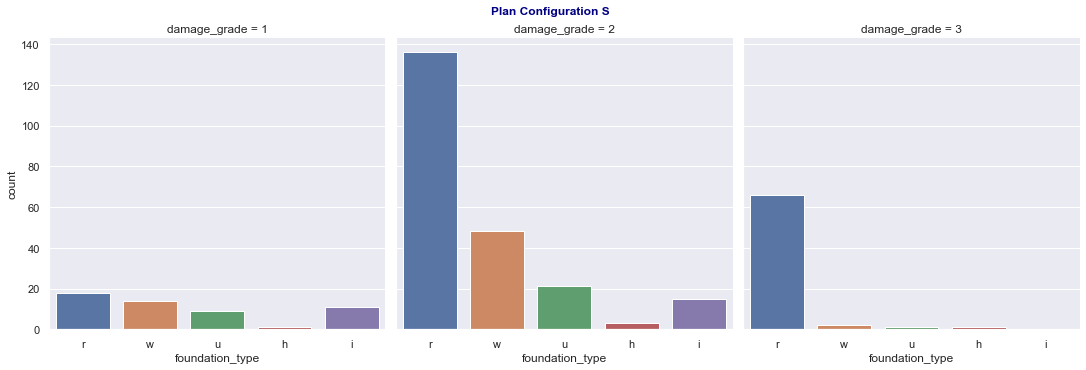

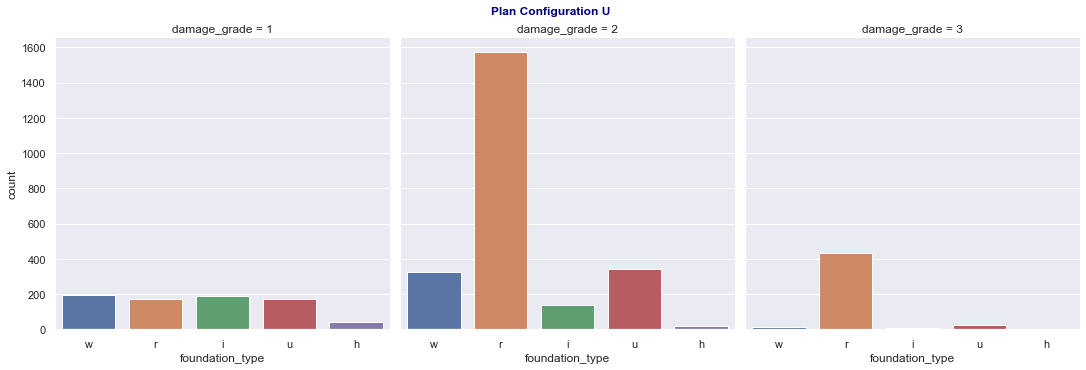

In [39]:
for x in range(0,10):
    ax = sb.catplot(x = "foundation_type", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

# Analysis on superstructure for each config plans

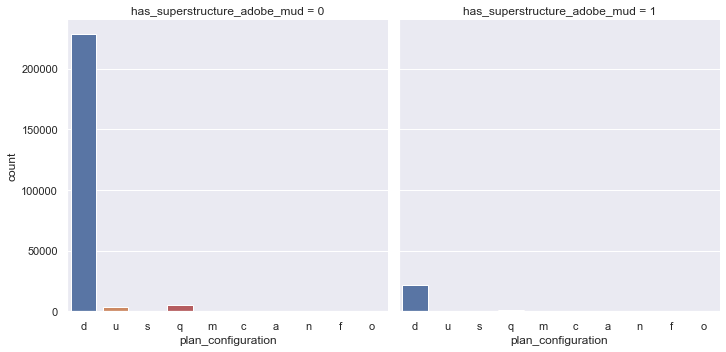

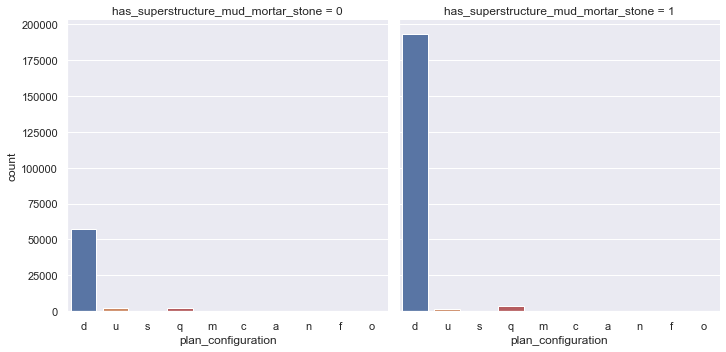

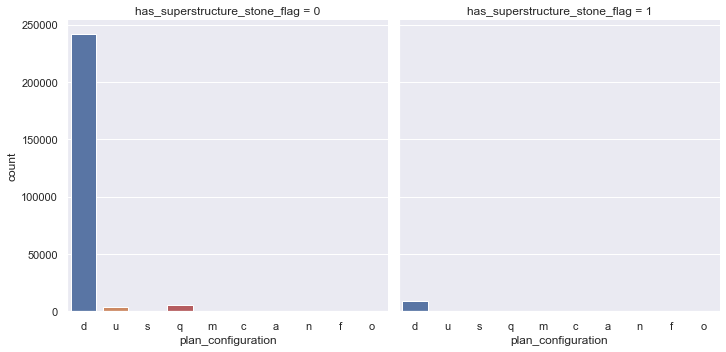

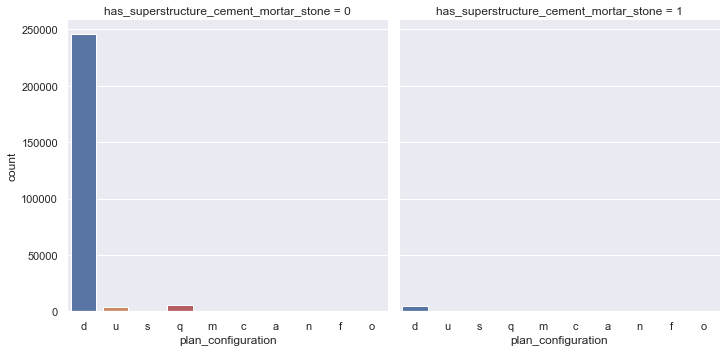

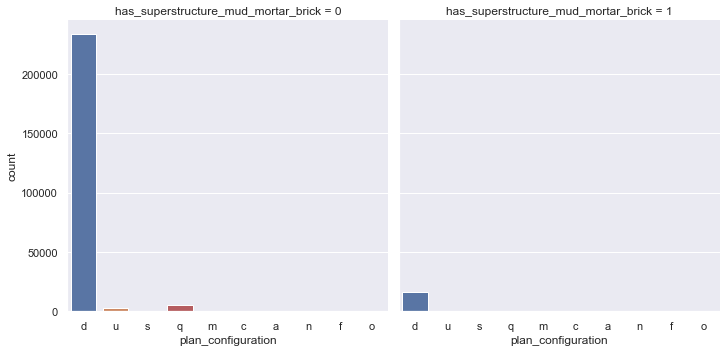

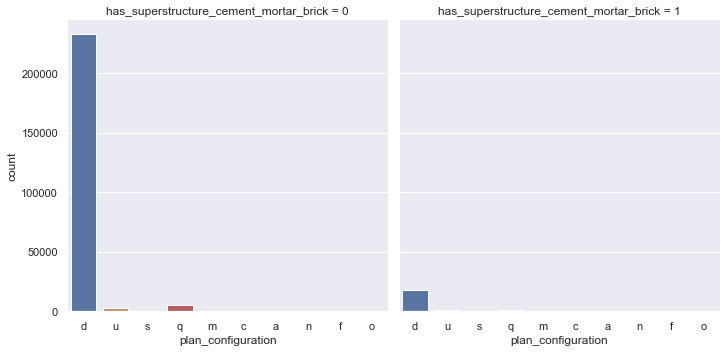

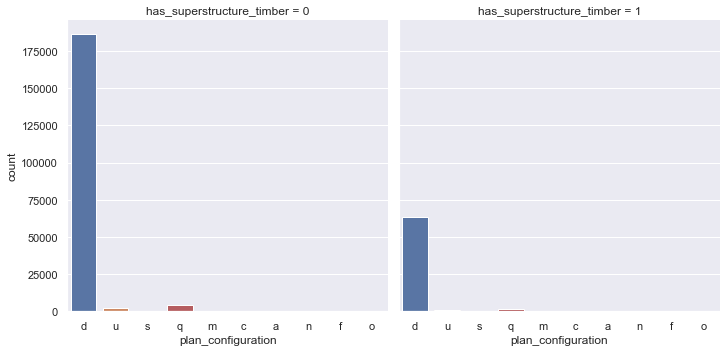

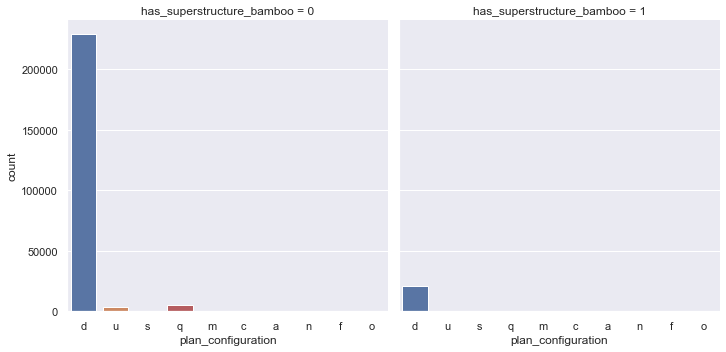

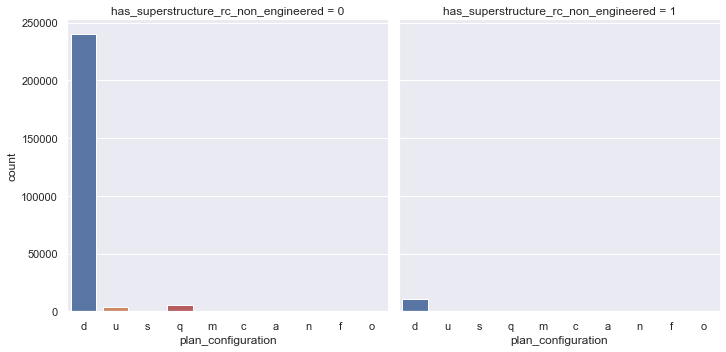

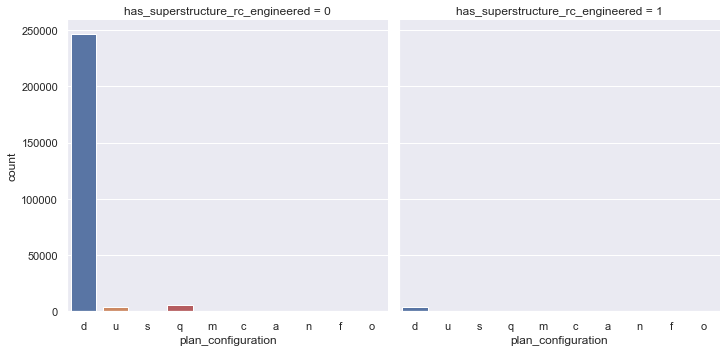

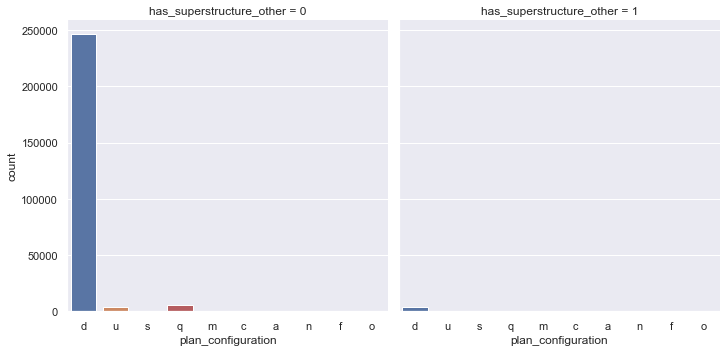

In [50]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_adobe_mud")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_mud_mortar_stone")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_stone_flag")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_cement_mortar_stone")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_mud_mortar_brick")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_cement_mortar_brick")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_timber")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_bamboo")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_rc_non_engineered")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_rc_engineered")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_other")

# Analysis on superstructure for each config plans

### Check if building had a secondary use for the config plans

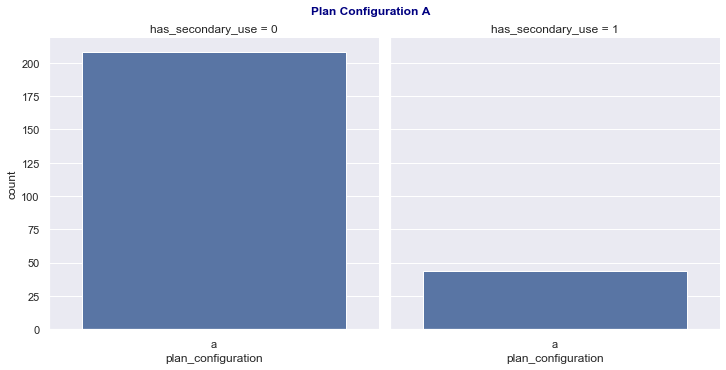

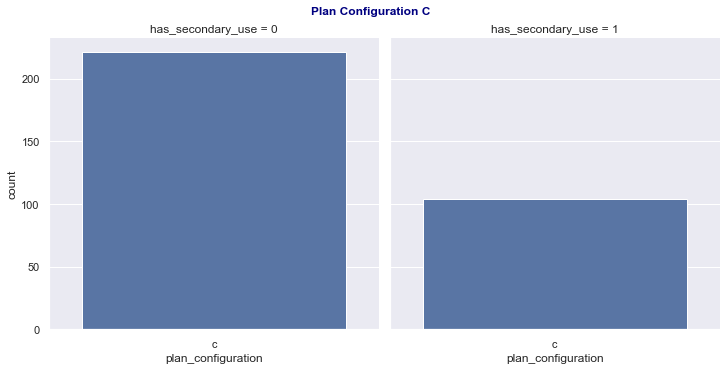

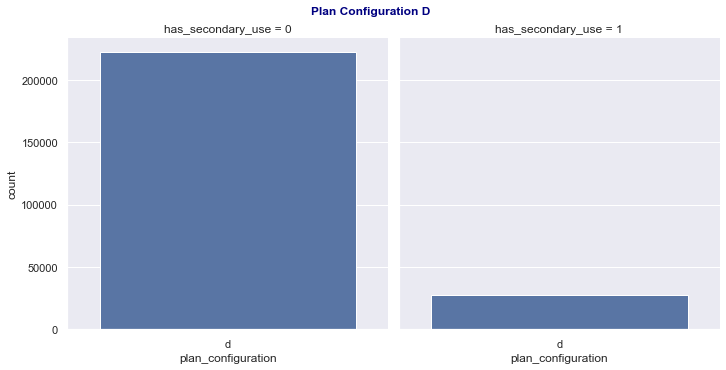

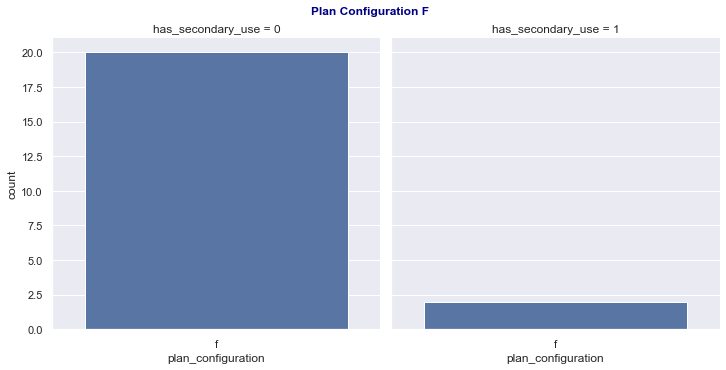

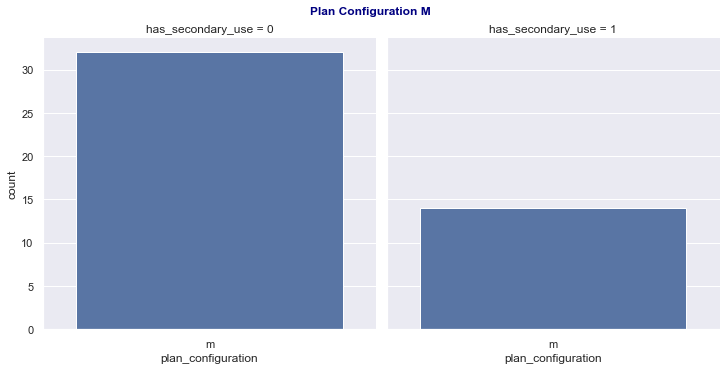

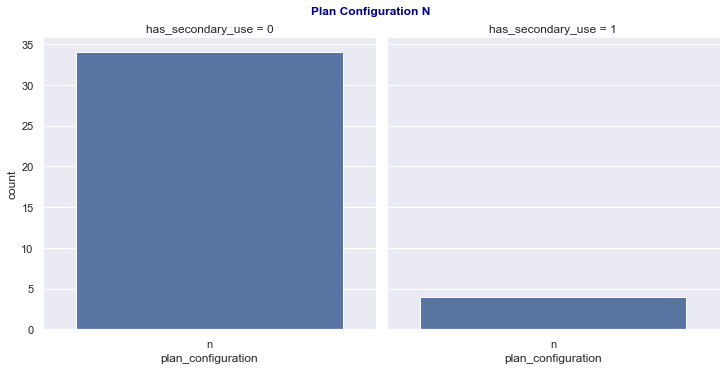

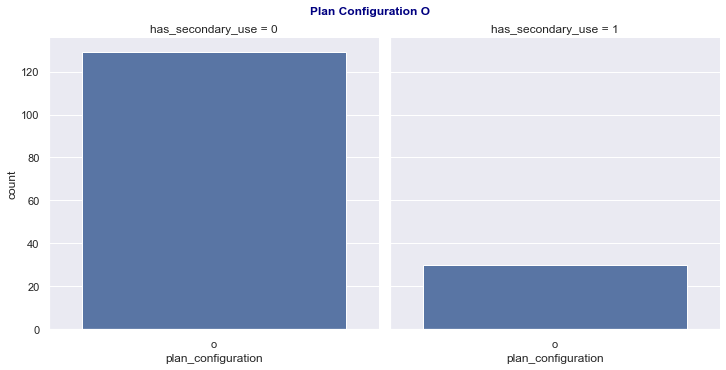

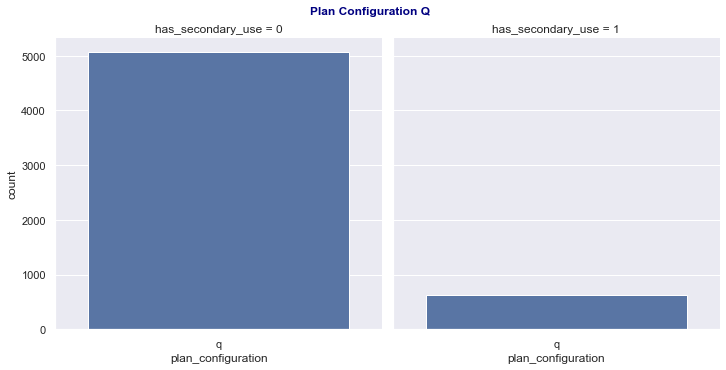

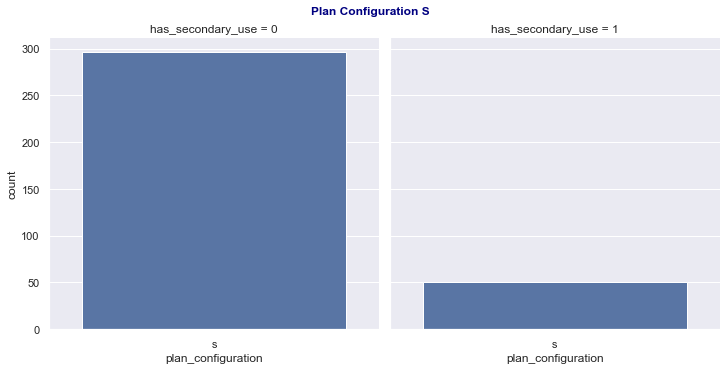

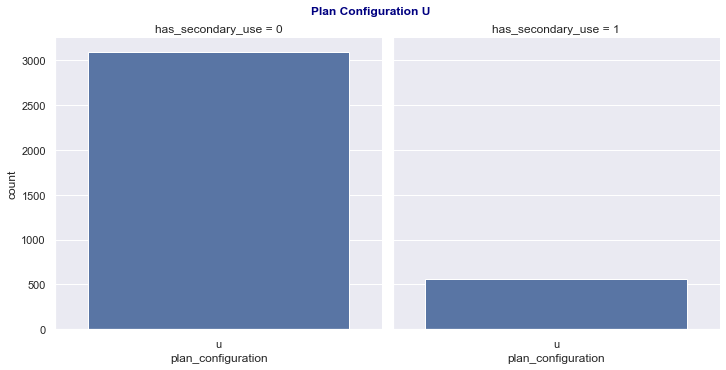

In [55]:
for x in range(0,10):
    ax = sb.catplot(x = "plan_configuration", data = config_planArr[x], kind = "count",height=5,col = "has_secondary_use")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

In [56]:
# To check if plan d was used other than for home

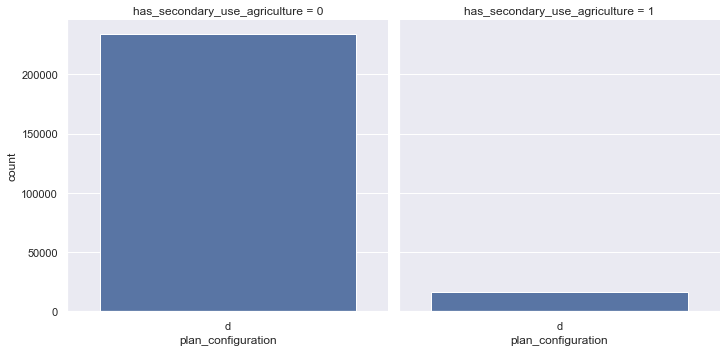

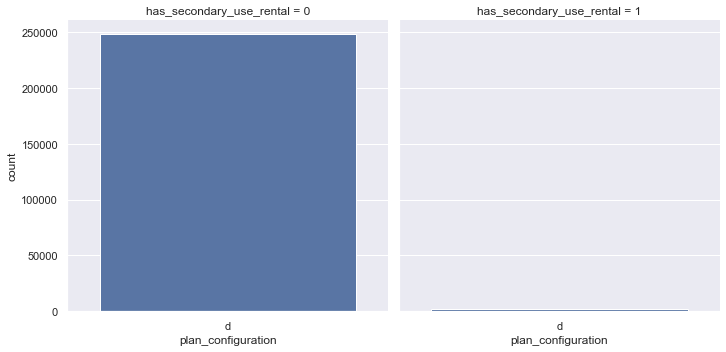

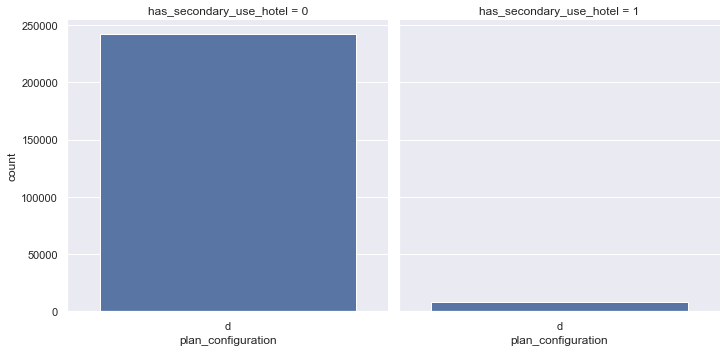

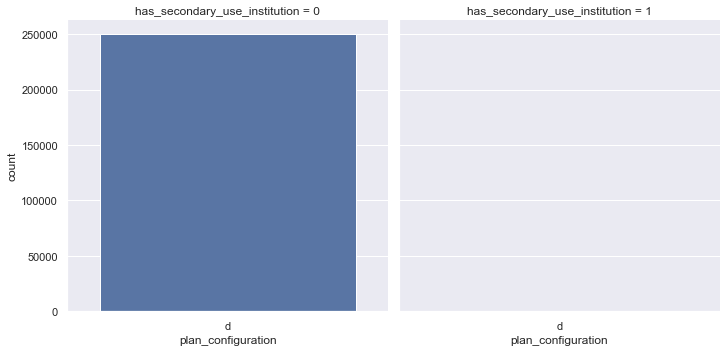

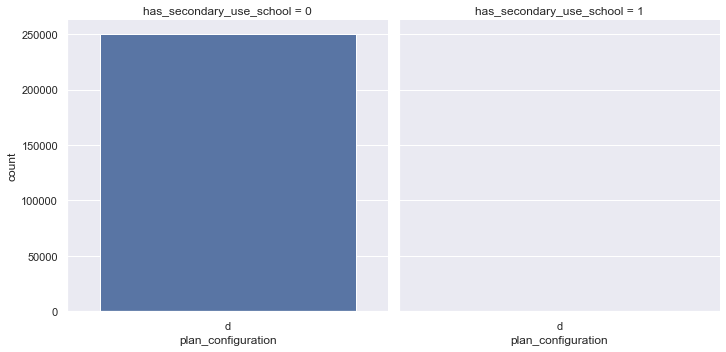

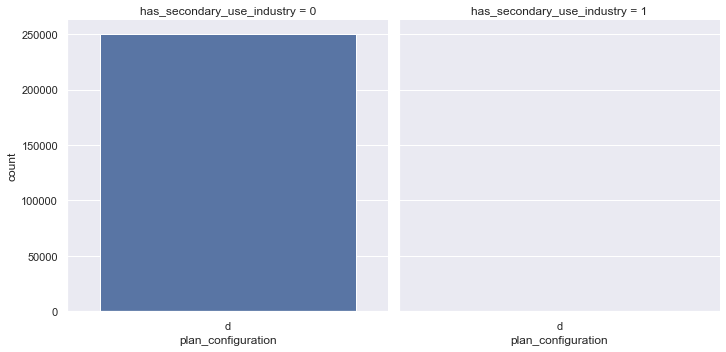

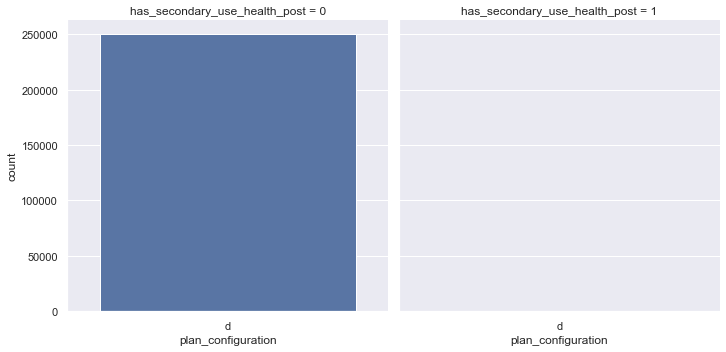

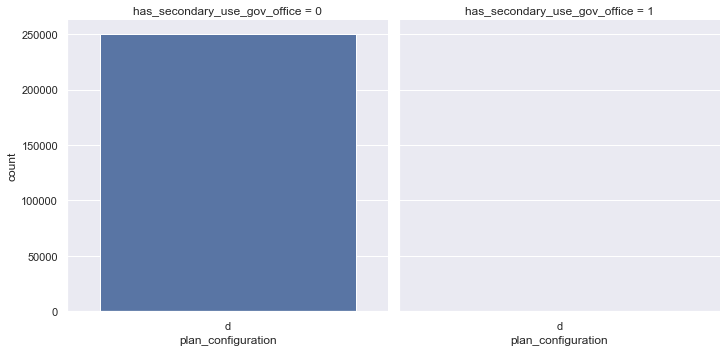

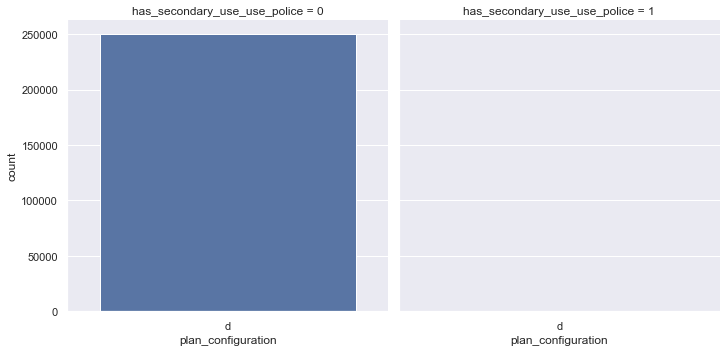

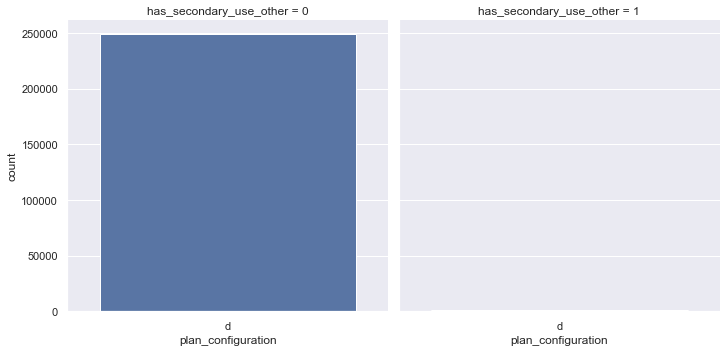

In [58]:
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_agriculture")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_rental")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_hotel")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_institution")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_school")

ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_industry")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_health_post")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_gov_office")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_use_police")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_other")

# References

https://stackoverflow.com/questions/19746350/how-does-one-change-color-in-markdown-cells-ipython-jupyter-notebook
https://matplotlib.org/3.1.0/gallery/color/named_colors.html
https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/
https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn-in-python
https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot